# Logistic Regression on BRCA subset of the TCGA dataset
#### Using Logistic Regression for breast cancer subtype classification

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clt

## Load and split the dataset

In [2]:
# Training set
X_train = pd.read_pickle("../data/tcga_brca_raw_19036_row_log_norm_train.pkl")
y_train = X_train["Ciriello_subtype"]
X_train.drop(['tcga_id', 'Ciriello_subtype', 'sample_id', 'cancer_type'], axis="columns", inplace=True)

# Final test set
X_test = pd.read_pickle("../data/tcga_brca_raw_19036_row_log_norm_test.pkl")
y_test = X_test["subtype"]
X_test.drop(['tcga_id', 'subtype', 'sample_id', 'cancer_type'], axis="columns", inplace=True)

# Order the features correctly

X_train = X_train.reindex(sorted(X_train.columns), axis="columns")
X_test = X_test.reindex(sorted(X_test.columns), axis="columns")

In [3]:
X_train.shape

(817, 19036)

In [4]:
X_test.shape

(236, 19036)

### Scale the data

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
genes = X_train.columns.values

In [7]:
genes[genes=="KRT17"]

array(['KRT17'], dtype=object)

## Code to tune parameter C

In [8]:
values=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
i=1
results = pd.DataFrame(columns=["Index", "C", "Accuracy"])
mean_scores = []
subtypes = ["Basal", "Her2", "LumA", "LumB", "Normal"]
all_reports = []

skf = StratifiedKFold(n_splits=5, shuffle=True)
for c in values:
    scores = []
    full_report = []

    for train_index, test_index in skf.split(X_train_scaled, y_train):

        X_cv_train, X_cv_val = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
        y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[test_index]

        clf = LogisticRegression(random_state=0, solver='liblinear', penalty="l1", C=c, multi_class="auto").fit(X_cv_train, y_cv_train)

        score = clf.score(X_cv_val, y_cv_val)
        results = results.append({'Fold': i, 'C' : c , 'Score' : score}, ignore_index=True)
        scores.append(score)
        full_report.append(classification_report(y_cv_val, clf.predict(X_cv_val), target_names=subtypes, output_dict=True))
        i+=1
    all_reports.append(full_report)
    i=1
    mean_scores.append(np.mean(scores))
    print('Results: {}'.format(scores))
    print('C: {}, Accuracy: {}'.format(c, np.mean(scores)))

#results.to_csv("parameter_tuning/LogisticRegression/tcga_c_tuning_all_genes.csv", index=False)
mean_scores

/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

Results: [0.1696969696969697, 0.1656441717791411, 0.1656441717791411, 0.1656441717791411, 0.1656441717791411]
C: 0.001, Accuracy: 0.1664547313627068


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

Results: [0.503030303030303, 0.5153374233128835, 0.50920245398773, 0.50920245398773, 0.50920245398773]
C: 0.01, Accuracy: 0.5091950176612754


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

Results: [0.806060606060606, 0.8220858895705522, 0.803680981595092, 0.7914110429447853, 0.7791411042944786]
C: 0.1, Accuracy: 0.8004759248931028


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Results: [0.8727272727272727, 0.8834355828220859, 0.8343558282208589, 0.901840490797546, 0.8711656441717791]
C: 1, Accuracy: 0.8727049637479085


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Results: [0.9090909090909091, 0.852760736196319, 0.8466257668711656, 0.8895705521472392, 0.8650306748466258]
C: 10, Accuracy: 0.8726157278304518


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Results: [0.8424242424242424, 0.8773006134969326, 0.9386503067484663, 0.8588957055214724, 0.8404907975460123]
C: 100, Accuracy: 0.8715523331474252


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Results: [0.9151515151515152, 0.901840490797546, 0.852760736196319, 0.852760736196319, 0.8895705521472392]
C: 1000, Accuracy: 0.8824168060977877


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Results: [0.8727272727272727, 0.8343558282208589, 0.8220858895705522, 0.8773006134969326, 0.8404907975460123]
C: 10000, Accuracy: 0.8493920803123258


[0.1664547313627068,
 0.5091950176612754,
 0.8004759248931028,
 0.8727049637479085,
 0.8726157278304518,
 0.8715523331474252,
 0.8824168060977877,
 0.8493920803123258]

In [ ]:
type(all_reports[4][0])

In [22]:
from statistics import stdev

subtypes = ["Basal", "Her2", "LumA", "LumB", "Normal"]
weights_train=[135,65,415,176,25]
mean_precisions = []
mean_recalls = []

for i in range(0,5):
    dict_aux = all_reports[4][i]
    arr_pre = []
    arr_rec = []
    for sub in subtypes:
        arr_pre.append(dict_aux[sub]['precision'])
        arr_rec.append(dict_aux[sub]['recall'])
    mean_precisions.append(np.average(arr_pre, weights=weights_train))
    mean_recalls.append(np.average(arr_rec, weights=weights_train))
    
print(mean_precisions)
print('{}+-{}'.format(np.mean(mean_precisions), stdev(mean_precisions)))
print("----------------")
print(mean_recalls)
print('{}+-{}'.format(np.mean(mean_recalls), stdev(mean_recalls)))

[0.8823132199721183, 0.9158391598879125, 0.8152304507818658, 0.9060201402451759, 0.9108382554357132]
0.8860482452645572+-0.04162340152134011
----------------
[0.8727096471812625, 0.8986726567286094, 0.8581390648166225, 0.8771693300384334, 0.888050291021498]
0.8789481979572852+-0.015386733578758839


In [ ]:
stdev([0.9090909090909091, 0.852760736196319, 0.8466257668711656, 0.8895705521472392, 0.8650306748466258])

### We can see that C=10 is the best parameter, hence why we'll use it to test our model

In [8]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty="l1", C=10, multi_class="auto").fit(X_train_scaled, y_train)

In [9]:
final_score = clf.score(X_test_scaled, y_test)
print('Confusion matrix\n', confusion_matrix(y_test, clf.predict(X_test_scaled)))
print('Accuracy', final_score)

Confusion matrix
 [[ 43   0   0   0   0]
 [  0  14   1   1   0]
 [  0   1 125   5   0]
 [  0   0   3  29   0]
 [  0   2   5   1   6]]
Accuracy 0.9194915254237288


In [23]:
print(classification_report(y_test, clf.predict(X_test_scaled), target_names=subtypes))

              precision    recall  f1-score   support

       Basal       1.00      1.00      1.00        43
        Her2       0.82      0.88      0.85        16
        LumA       0.93      0.95      0.94       131
        LumB       0.81      0.91      0.85        32
      Normal       1.00      0.43      0.60        14

   micro avg       0.92      0.92      0.92       236
   macro avg       0.91      0.83      0.85       236
weighted avg       0.92      0.92      0.91       236



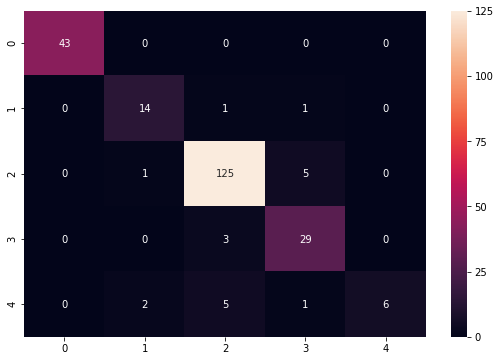

In [11]:
import matplotlib.pyplot as plt
conf_matrix = pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test_scaled)))
plt.figure(figsize=(9, 6))
sn.heatmap(conf_matrix, annot=True, fmt='g')
#conf_matrix.to_csv("results/LogisticRegression/tcga_confusion_matrix_all_genes.csv")

In [12]:
y_test.value_counts()

LumA      131
Basal      43
LumB       32
Her2       16
Normal     14
Name: subtype, dtype: int64

# Relevant gene analysis

In [10]:
print("First class (Basal) has {} genes counting".format(len(clf.coef_[0][clf.coef_[0]!=0])))
rel_genes_1 = genes[clf.coef_[0]!=0]
print("Second class (HER2) has {} genes counting".format(len(clf.coef_[1][clf.coef_[1]!=0])))
rel_genes_2 = genes[clf.coef_[1]!=0]
print("Third class (Luminal A) has {} genes counting".format(len(clf.coef_[2][clf.coef_[2]!=0])))
rel_genes_3 = genes[clf.coef_[2]!=0]
print("Fourth class (Luminal B) has {} genes counting".format(len(clf.coef_[3][clf.coef_[3]!=0])))
rel_genes_4 = genes[clf.coef_[3]!=0]
print("Fifth class (Normal-like) has {} genes counting".format(len(clf.coef_[4][clf.coef_[4]!=0])))
rel_genes_5 = genes[clf.coef_[4]!=0]

First class (Basal) has 501 genes counting
Second class (HER2) has 390 genes counting
Third class (Luminal A) has 716 genes counting
Fourth class (Luminal B) has 973 genes counting
Fifth class (Normal-like) has 371 genes counting


In [11]:
int_1_2 = np.intersect1d(rel_genes_1, rel_genes_2)

In [12]:
int_1_2_3 = np.intersect1d(int_1_2, rel_genes_3)

In [13]:
int_1_2_3_4 = np.intersect1d(int_1_2_3, rel_genes_4)

In [14]:
int_1_2_3_4_5 = np.intersect1d(int_1_2_3_4, rel_genes_5)

In [15]:
int_1_2_3_4_5

array([], dtype=object)

#### We can see that no genes are relevant for all five subtypes, curious result

### Let's check the weights of the PAM50 panel genes that are more relevant for that class

In [16]:
pam50_genes = np.array(["MIA", "SFRP1", "KRT14", "KRT17", "KRT5", "FGFR4", "GRB7", "ERBB2", "BAG1", "MDM2", "ACTR3B", "BLVRA", "CXXC5", "TMEM45B", "MMP11", "FOXC1", "EGFR", "CDH3", "PHGDH", "MYC", "CCNE1" ,"CDCA1", "CDC20", "KIF2C", "TYMS", "KNTC2", "UBE2T", "MELK", "PTTG1", "CCNB1", "CDC6", "MYBL2", "BIRC5", "CENPF", "EXO1", "ORC6L", "ANLN", "UBE2C", "RRM2", "MKI67", "CEP55", "PGR", "NAT1", "SLC39A6", "BCL2", "ESR1", "MAPT", "GPR160", "MLPH", "FOXA1"])
pam50_genes_tcga = np.array(["MIA", "SFRP1", "KRT14", "KRT17", "KRT5", "FGFR4", "GRB7", "ERBB2", "BAG1", "MDM2", "ACTR3B", "BLVRA", "CXXC5", "TMEM45B", "MMP11", "FOXC1", "EGFR", "CDH3", "PHGDH", "MYC", "CCNE1" ,"NUF2", "CDC20", "KIF2C", "TYMS", "NDC80", "UBE2T", "MELK", "PTTG1", "CCNB1", "CDC6", "MYBL2", "BIRC5", "CENPF", "EXO1", "ORC6", "ANLN", "UBE2C", "RRM2", "MKI67", "CEP55", "PGR", "NAT1", "SLC39A6", "BCL2", "ESR1", "MAPT", "GPR160", "MLPH", "FOXA1"])

In [17]:
pam50_basal = np.array(['FOXC1', 'MIA', 'NDC80', 'CEP55', 'ANLN', 'MELK', 'GPR160', 'TMEM45B', 'ESR1', 'FOXA1'])
pam50_her2 = np.array(['ERBB2', 'GRB7', 'FGFR4', 'BLVRA', 'BAG1', 'CDC20', 'CCNE1', 'ACTR3B', 'MYC', 'SFRP1'])
pam50_normal = np.array(['KRT14', 'KRT17', 'KRT5', 'MLPH', 'CCNB1', 'CDC6', 'TYMS', 'UBE2T', 'RRM2', 'MMP11'])
pam50_lumB = np.array(['CXXC5', 'ORC6', 'MDM2', 'KIF2C', 'PGR', 'MKI67', 'BCL2', 'EGFR', 'PHGDH', 'CDH3'])
pam50_lumA = np.array(['NAT1', 'SLC39A6', 'MAPT', 'UBE2C', 'PTTG1', 'EXO1', 'CENPF', 'NUF2', 'MYBL2', 'BIRC5'])

In [18]:
pam50_in_all = np.in1d(genes, pam50_genes_tcga)

##### PAM50 gene weights for Basal

In [19]:
pam50_weight_basal = clf.coef_[0][pam50_in_all]
pam50_weight_her2 = clf.coef_[1][pam50_in_all]
pam50_weight_lumA = clf.coef_[2][pam50_in_all]
pam50_weight_lumB = clf.coef_[3][pam50_in_all]
pam50_weight_normal = clf.coef_[4][pam50_in_all]

In [20]:
print("Number of genes from PAM50 with weight !=0 Basal: {}".format(len(pam50_weight_basal[pam50_weight_basal!=0])))
print("Number of genes from PAM50 with weight !=0 Her2: {}".format(len(pam50_weight_her2[pam50_weight_her2!=0])))
print("Number of genes from PAM50 with weight !=0 Luminal A: {}".format(len(pam50_weight_lumA[pam50_weight_lumA!=0])))
print("Number of genes from PAM50 with weight !=0 Lumina B: {}".format(len(pam50_weight_lumB[pam50_weight_lumB!=0])))
print("Number of genes from PAM50 with weight !=0 Normal-like: {}".format(len(pam50_weight_normal[pam50_weight_normal!=0])))

Number of genes from PAM50 with weight !=0 Basal: 15
Number of genes from PAM50 with weight !=0 Her2: 14
Number of genes from PAM50 with weight !=0 Luminal A: 15
Number of genes from PAM50 with weight !=0 Lumina B: 24
Number of genes from PAM50 with weight !=0 Normal-like: 6


In [21]:
print("Genes from PAM50 with weight !=0 Basal: {}".format(pam50_genes_tcga[pam50_weight_basal!=0]))
print("Genes from PAM50 with weight !=0 Her2: {}".format(pam50_genes_tcga[pam50_weight_her2!=0]))
print("Genes from PAM50 with weight !=0 Luminal A: {}".format(pam50_genes_tcga[pam50_weight_lumA!=0]))
print("Genes from PAM50 with weight !=0 Lumina B: {}".format(pam50_genes_tcga[pam50_weight_lumB!=0]))
print("Genes from PAM50 with weight !=0 Normal-like: {}".format(pam50_genes_tcga[pam50_weight_normal!=0]))

Genes from PAM50 with weight !=0 Basal: ['GRB7' 'ERBB2' 'BAG1' 'BLVRA' 'FOXC1' 'MYC' 'CCNE1' 'NUF2' 'KIF2C' 'MELK'
 'UBE2C' 'RRM2' 'BCL2' 'MAPT' 'MLPH']
Genes from PAM50 with weight !=0 Her2: ['SFRP1' 'GRB7' 'FOXC1' 'EGFR' 'PHGDH' 'CCNE1' 'NUF2' 'CDC20' 'MYBL2'
 'ORC6' 'SLC39A6' 'BCL2' 'ESR1' 'MAPT']
Genes from PAM50 with weight !=0 Luminal A: ['SFRP1' 'KRT17' 'TYMS' 'NDC80' 'UBE2T' 'MELK' 'CENPF' 'ANLN' 'UBE2C'
 'RRM2' 'CEP55' 'NAT1' 'BCL2' 'ESR1' 'GPR160']
Genes from PAM50 with weight !=0 Lumina B: ['KRT14' 'KRT5' 'GRB7' 'ACTR3B' 'BLVRA' 'CXXC5' 'FOXC1' 'EGFR' 'CDH3'
 'PHGDH' 'CCNE1' 'CDC20' 'TYMS' 'NDC80' 'UBE2T' 'CCNB1' 'EXO1' 'UBE2C'
 'RRM2' 'NAT1' 'BCL2' 'GPR160' 'MLPH' 'FOXA1']
Genes from PAM50 with weight !=0 Normal-like: ['KRT5' 'GRB7' 'TYMS' 'CENPF' 'ANLN' 'FOXA1']


In [22]:
print("Genes from PAM50 Basal specific with weight !=0 Basal: {}".format(np.intersect1d(pam50_genes_tcga[pam50_weight_basal!=0], pam50_basal)))
print("Genes from PAM50 Her2 specific with weight !=0 Her2: {}".format(np.intersect1d(pam50_genes_tcga[pam50_weight_her2!=0], pam50_her2)))
print("Genes from PAM50 lumA specific with weight !=0 Luminal A: {}".format(np.intersect1d(pam50_genes_tcga[pam50_weight_lumA!=0], pam50_lumA)))
print("Genes from PAM50 with weight !=0 Lumina B: {}".format(np.intersect1d(pam50_genes_tcga[pam50_weight_lumB!=0], pam50_lumB)))
print("Genes from PAM50 with weight !=0 Normal-like: {}".format(np.intersect1d(pam50_genes_tcga[pam50_weight_normal!=0], pam50_normal)))

Genes from PAM50 Basal specific with weight !=0 Basal: ['FOXC1' 'MELK']
Genes from PAM50 Her2 specific with weight !=0 Her2: ['CCNE1' 'CDC20' 'GRB7' 'SFRP1']
Genes from PAM50 lumA specific with weight !=0 Luminal A: ['CENPF' 'NAT1' 'UBE2C']
Genes from PAM50 with weight !=0 Lumina B: ['BCL2' 'CDH3' 'CXXC5' 'EGFR' 'PHGDH']
Genes from PAM50 with weight !=0 Normal-like: ['KRT5' 'TYMS']


In [25]:
df_all = pd.DataFrame(columns=["Gene Weight", "Genes", "Subtype"])

df_normal = pd.DataFrame()
df_normal["Gene Weight"] = pam50_weight_normal
df_normal["Genes"] = genes[pam50_in_all]
df_normal["Subtype"] = 'Normal-like'
df_all = df_all.append(df_normal)

df_basal = pd.DataFrame()
df_basal["Gene Weight"] = pam50_weight_basal
df_basal["Genes"] = genes[pam50_in_all]
df_basal["Subtype"] = 'Basal'
df_all = df_all.append(df_basal)

df_lumA = pd.DataFrame()
df_lumA["Gene Weight"] = pam50_weight_lumA
df_lumA["Genes"] = genes[pam50_in_all]
df_lumA["Subtype"] = 'Luminal A'
df_all = df_all.append(df_lumA)

df_lumB = pd.DataFrame()
df_lumB["Gene Weight"] = pam50_weight_lumB
df_lumB["Genes"] = genes[pam50_in_all]
df_lumB["Subtype"] = 'Luminal B'
df_all = df_all.append(df_lumB)

df_her2 = pd.DataFrame()
df_her2["Gene Weight"] = pam50_weight_her2
df_her2["Genes"] = genes[pam50_in_all]
df_her2["Subtype"] = 'Her2-enriched'
df_all = df_all.append(df_her2)

## Plot PAM50 weights all classes

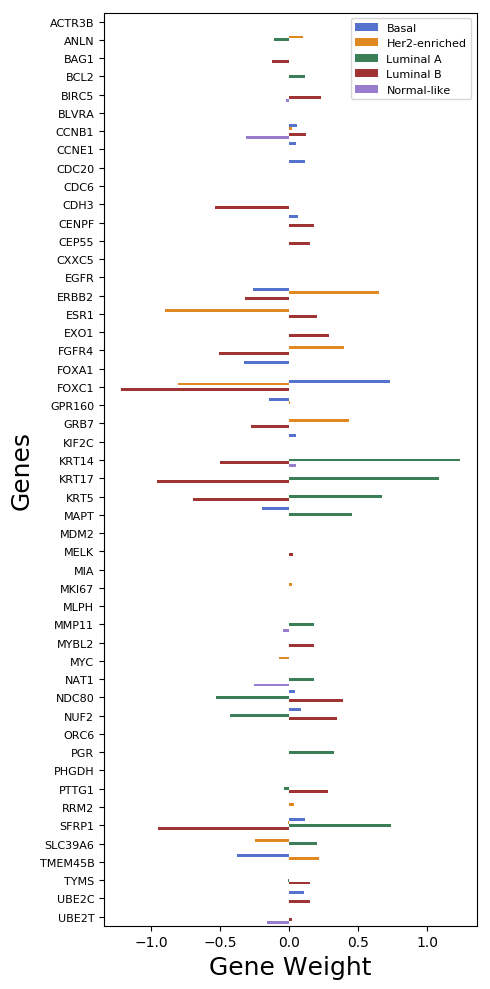

In [275]:
fig = plt.figure(figsize = (5,10))

my_palette = sns.color_palette(['royalblue', 'darkorange', 'seagreen', 'firebrick', 'mediumpurple'])
colors = ['mediumpurple', 'royalblue', 'seagreen', 'firebrick', 'darkorange']
plt.style.use('default')
ax = sns.barplot(x="Gene Weight", y="Genes", data=df_all, hue='Subtype', palette=my_palette)
ax.set_ylabel('Genes', fontsize=18)
ax.set_xlabel('Gene Weight', fontsize=18)
ax.tick_params(axis='y', labelsize=8)
plt.legend(loc='upper right', fontsize=8)
fig.tight_layout()
plt.savefig('../figures/pam50_weights_all_classes.pdf', bbox_inches='tight')

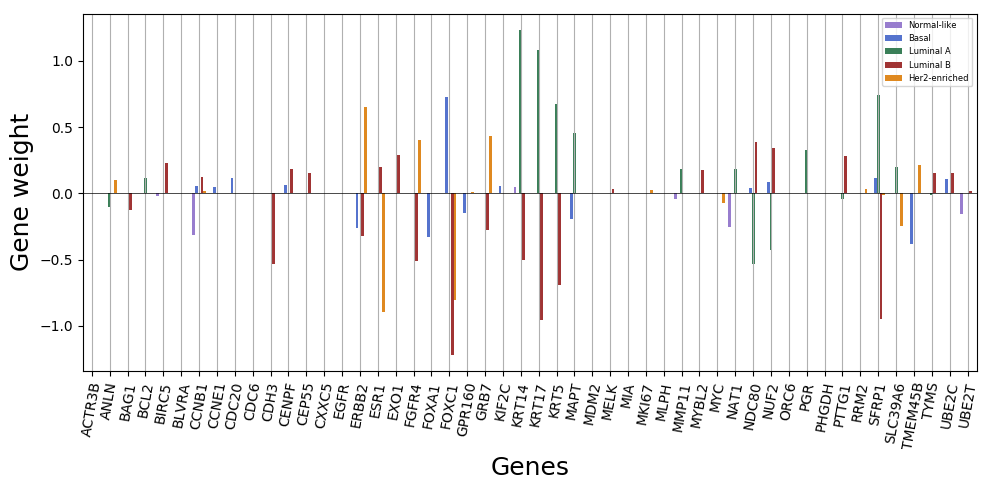

In [39]:
fig = plt.figure(figsize = (10,5))


my_palette = sns.color_palette(['mediumpurple', 'royalblue', 'seagreen', 'firebrick', 'darkorange'])
plt.style.use('default')
ax = sns.barplot(x="Genes", y="Gene Weight", data=df_all, hue='Subtype', palette=my_palette, dodge=True)
ax.set_ylabel('Gene weight', fontsize=18)
ax.set_xlabel('Genes', fontsize=18)
ax.tick_params(axis='x', labelsize=10, labelrotation=80)
plt.legend(loc='upper right', fontsize=6)
fig.tight_layout()
plt.gca().xaxis.grid(True)
plt.axhline(y=0,color='black', lw=0.5)
#plt.savefig('../figures/pam50_weights_all_classes_horizontal.pdf', bbox_inches='tight')

### Plot PAM50 weights Basal

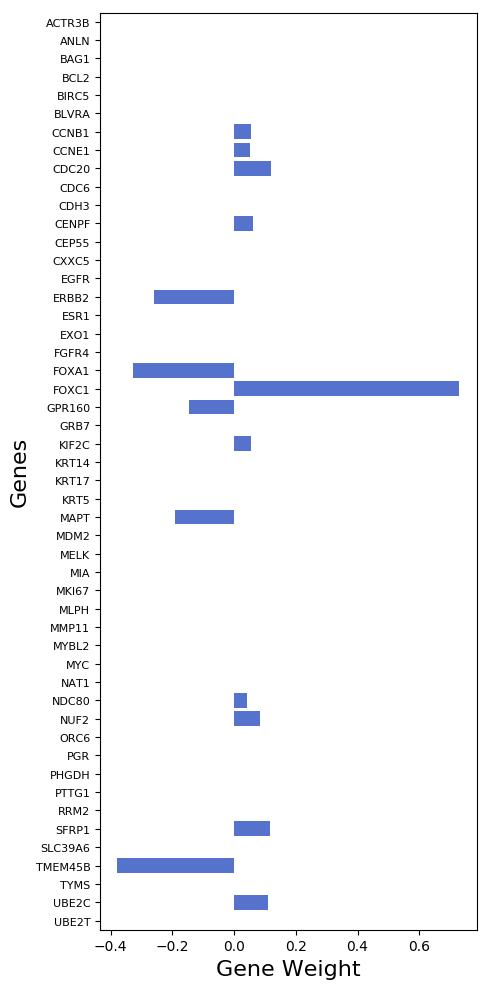

In [280]:
fig = plt.figure(figsize = (5,10))

colors = ['mediumpurple', 'royalblue', 'seagreen', 'firebrick', 'darkorange']
plt.style.use('default')
ax = sns.barplot(x="Gene Weight", y="Genes", data=df_basal, color='royalblue')
ax.set_ylabel('Genes', fontsize=16)
ax.set_xlabel('Gene Weight', fontsize=16)
ax.tick_params(axis='y', labelsize=8)
fig.tight_layout()
plt.savefig('../figures/pam50_weights_basal.pdf', bbox_inches='tight')

### Plot PAM50 weights HER2

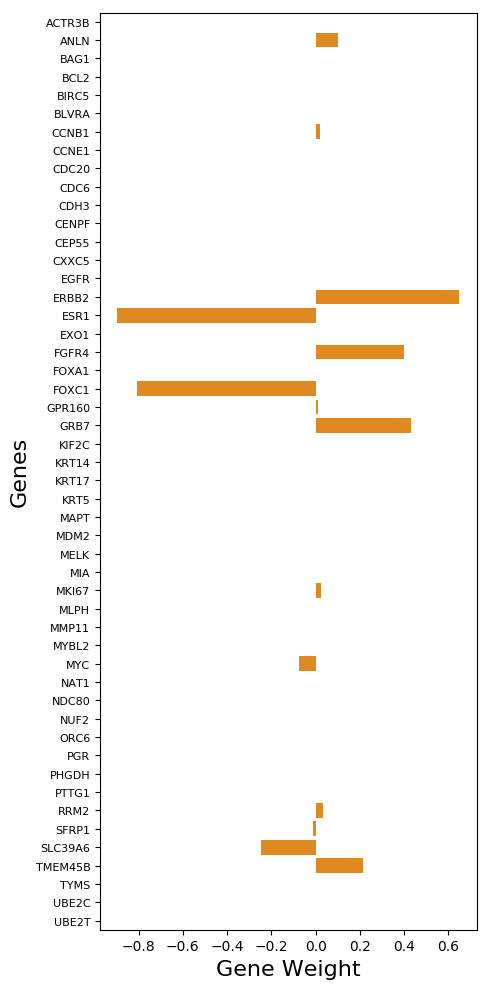

In [284]:
fig = plt.figure(figsize = (5,10))

plt.style.use('default')
ax = sns.barplot(x="Gene Weight", y="Genes", data=df_her2, color='darkorange')
ax.set_ylabel('Genes', fontsize=16)
ax.set_xlabel('Gene Weight', fontsize=16)
ax.tick_params(axis='y', labelsize=8)
fig.tight_layout()
plt.savefig('../figures/pam50_weights_her2.pdf', bbox_inches='tight')

### Plot PAM50 weights Luminal A

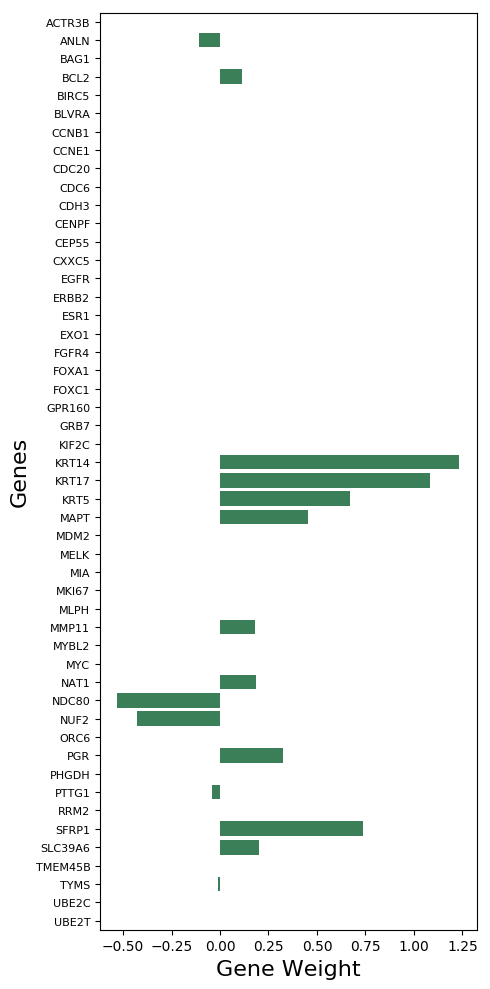

In [286]:
fig = plt.figure(figsize = (5,10))

plt.style.use('default')
ax = sns.barplot(x="Gene Weight", y="Genes", data=df_lumA, color='seagreen')
ax.set_ylabel('Genes', fontsize=16)
ax.set_xlabel('Gene Weight', fontsize=16)
ax.tick_params(axis='y', labelsize=8)
fig.tight_layout()
plt.savefig('../figures/pam50_weights_lumA.pdf', bbox_inches='tight')

### Plot PAM50 weights Luminal B

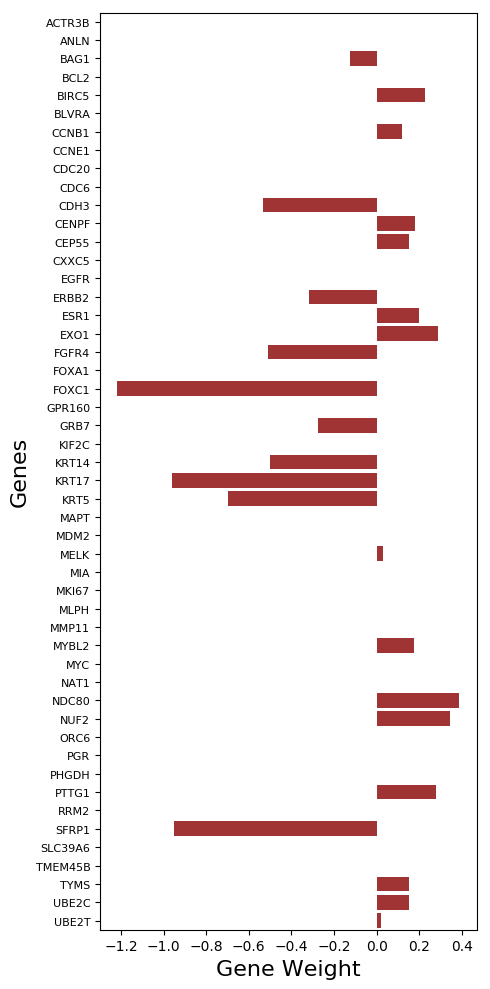

In [288]:
fig = plt.figure(figsize = (5,10))

plt.style.use('default')
ax = sns.barplot(x="Gene Weight", y="Genes", data=df_lumB, color='firebrick')
ax.set_ylabel('Genes', fontsize=16)
ax.set_xlabel('Gene Weight', fontsize=16)
ax.tick_params(axis='y', labelsize=8)
fig.tight_layout()
plt.savefig('../figures/pam50_weights_lumB.pdf', bbox_inches='tight')

### Plot PAM50 weights Normal-like

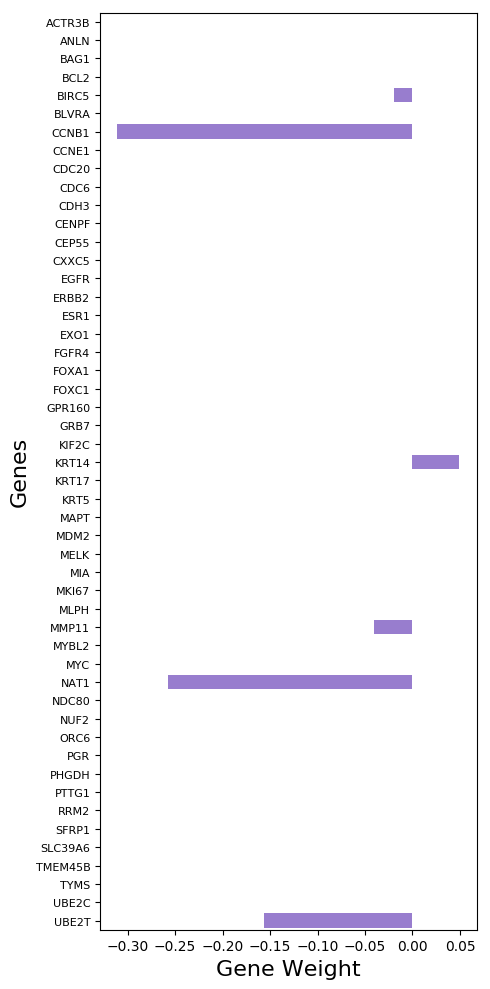

In [290]:
fig = plt.figure(figsize = (5,10))

plt.style.use('default')
ax = sns.barplot(x="Gene Weight", y="Genes", data=df_normal, color='mediumpurple')
ax.set_ylabel('Genes', fontsize=16)
ax.set_xlabel('Gene Weight', fontsize=16)
ax.tick_params(axis='y', labelsize=8)
fig.tight_layout()
plt.savefig('../figures/pam50_weights_normal.pdf', bbox_inches='tight')

## 50 most influential for each class

In [23]:
sort_idx_1 = np.argsort(abs(clf.coef_[0]))

In [24]:
sort_idx_1[-50:]

array([ 4219,  4187,  8492,  4009, 11987, 13531,  5703,  5506,  2700,
       14988,  5481,  5616, 12148, 12731,  5774,  3087, 12479,  5368,
        3244,  3674,  1486, 13400, 18665,  1845, 15665, 16142,  2539,
          60,  2701,  5512, 18111,   544,  6949, 10193,  5614,  3477,
       17292, 18339, 14936, 14584,  6064,  5961,  7780,  3242, 11469,
        8533,  9474, 12553, 11867,  6615])

#### 50 most influential genes subtype 1

In [25]:
inf_50_genes_1 = genes[sort_idx_1[-50:]]

In [26]:
inf_50_genes_1_weight = clf.coef_[0][sort_idx_1[-50:]]

In [27]:
inf_50_genes_1_weight

array([ 0.38284384, -0.38317208,  0.38518425, -0.39008018, -0.39283577,
        0.40449903,  0.40643476, -0.41615543, -0.41790692,  0.42697358,
        0.43359262,  0.43894812, -0.44335229, -0.44499843,  0.45533633,
        0.46544131,  0.49133587,  0.49319611,  0.4961675 , -0.49681531,
       -0.49796291,  0.49807067,  0.49909697,  0.50284445,  0.52182609,
        0.53452794, -0.53681855, -0.53724366, -0.56908247,  0.60202882,
        0.60622812, -0.61263355, -0.64415628, -0.68214514,  0.73003913,
        0.76440591, -0.76684331, -0.8062482 , -0.81331164, -0.82155902,
        0.82720705,  0.83408763,  0.86125049,  0.87483953, -0.88891323,
        1.02703965,  1.09203949,  1.50988111,  1.69540619, -1.8974185 ])

#### 50 most influential genes subtype 2

In [28]:
sort_idx_2 = np.argsort(abs(clf.coef_[1]))
inf_50_genes_2 = genes[sort_idx_2[-50:]]
inf_50_genes_2_weight = clf.coef_[1][sort_idx_2[-50:]]

In [29]:
inf_50_genes_2_weight

array([ 0.62375993,  0.64982416, -0.65042196,  0.66327335, -0.66693783,
       -0.68602131, -0.68984713,  0.69532513, -0.70330337, -0.70805113,
        0.71928692, -0.72927569, -0.74805026, -0.75836411, -0.75883276,
        0.76139545,  0.77654552, -0.77777629, -0.79941115, -0.803972  ,
       -0.80678173, -0.81359254, -0.82094016, -0.83816818, -0.84069832,
       -0.84349438, -0.85155786, -0.86183159,  0.86776706, -0.89690662,
        0.90531276,  0.91382624,  0.91723649, -0.92151206,  0.93780465,
        1.00174363,  1.00437826,  1.00467955, -1.02078365, -1.03442023,
        1.11389063, -1.14108379, -1.26531742, -1.27843716,  1.3754982 ,
        1.38840219,  1.48877505,  1.53655474, -1.62708643, -2.04145888])

#### 50 most influential genes subtype 3

In [30]:
sort_idx_3 = np.argsort(abs(clf.coef_[2]))
inf_50_genes_3 = genes[sort_idx_3[-50:]]
inf_50_genes_3_weight = clf.coef_[2][sort_idx_3[-50:]]

#### 50 most influential genes subtype 4

In [31]:
sort_idx_4 = np.argsort(abs(clf.coef_[3]))
inf_50_genes_4 = genes[sort_idx_3[-50:]]
inf_50_genes_4_weight = clf.coef_[3][sort_idx_4[-50:]]

#### 50 most influential genes subtype 5

In [32]:
sort_idx_5 = np.argsort(abs(clf.coef_[4]))
inf_50_genes_5 = genes[sort_idx_5[-50:]]
inf_50_genes_5_weight = clf.coef_[4][sort_idx_5[-50:]]

### Plot weights top 100 subtype 1 - Basal

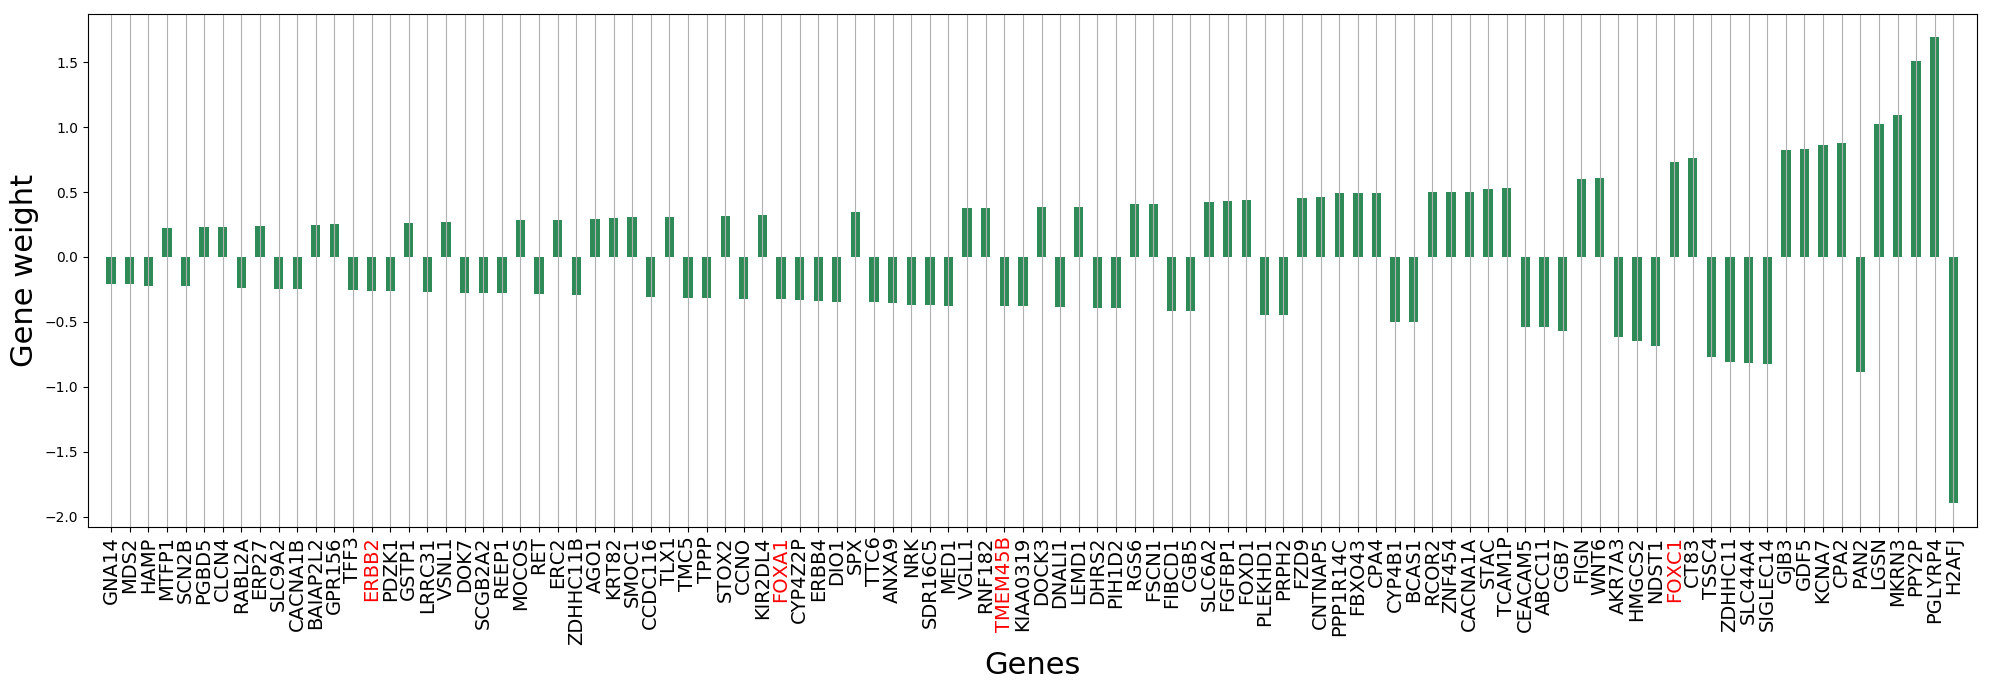

In [60]:
data_exp = clf.coef_[0][sort_idx_1][-100:]

fig = plt.figure(figsize = (20,7))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(100)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, genes[sort_idx_1][-100:])
ax.tick_params(axis='x', labelsize=14, labelrotation=90)

my_colors =['red' if val in pam50_genes_tcga else 'black' for val in genes[sort_idx_1][-100:]]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.margins(x=0.01)
plt.gca().xaxis.grid(True)
fig.tight_layout()
plt.savefig('../figures/top_features_100_log_res_basal.pdf', bbox_inches='tight')

### Plot weights top 100 subtype 2 - HER2

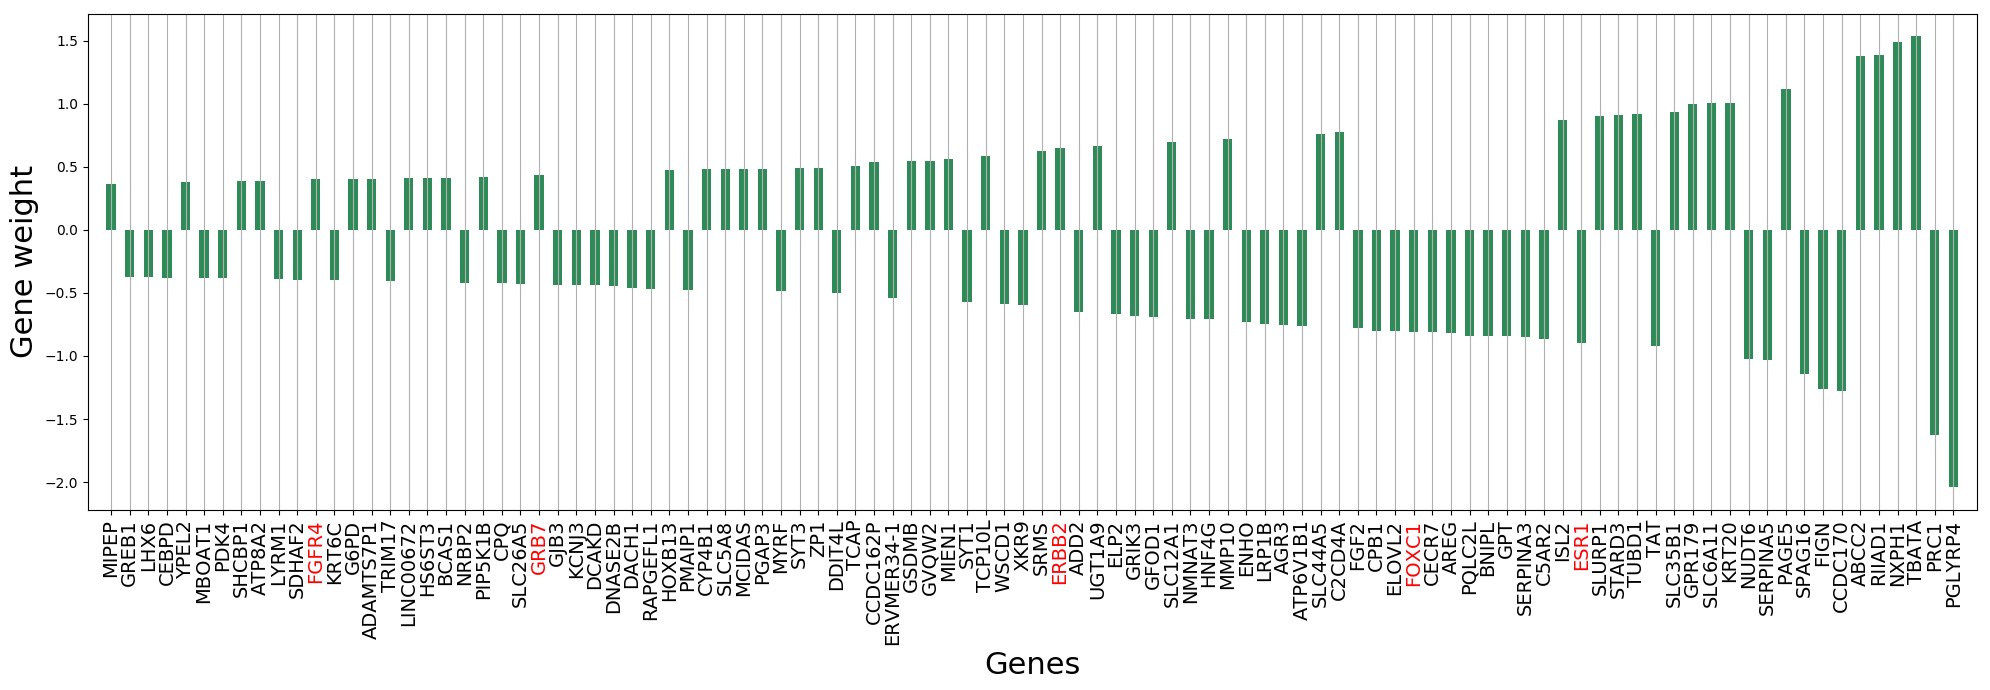

In [61]:
data_exp = clf.coef_[1][sort_idx_2][-100:]

fig = plt.figure(figsize = (20,7))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(100)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, genes[sort_idx_2][-100:])
ax.tick_params(axis='x', labelsize=14, labelrotation=90)

my_colors =['red' if val in pam50_genes_tcga else 'black' for val in genes[sort_idx_2][-100:]]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.margins(x=0.01)
plt.gca().xaxis.grid(True)
fig.tight_layout()
plt.savefig('../figures/top_features_100_log_res_her2.pdf', bbox_inches='tight')

In [104]:
pam50_genes_tcga

array(['MIA', 'SFRP1', 'KRT14', 'KRT17', 'KRT5', 'FGFR4', 'GRB7', 'ERBB2',
       'BAG1', 'MDM2', 'ACTR3B', 'BLVRA', 'CXXC5', 'TMEM45B', 'MMP11',
       'FOXC1', 'EGFR', 'CDH3', 'PHGDH', 'MYC', 'CCNE1', 'NUF2', 'CDC20',
       'KIF2C', 'TYMS', 'NDC80', 'UBE2T', 'MELK', 'PTTG1', 'CCNB1',
       'CDC6', 'MYBL2', 'BIRC5', 'CENPF', 'EXO1', 'ORC6', 'ANLN', 'UBE2C',
       'RRM2', 'MKI67', 'CEP55', 'PGR', 'NAT1', 'SLC39A6', 'BCL2', 'ESR1',
       'MAPT', 'GPR160', 'MLPH', 'FOXA1'], dtype='<U7')

### Plot weights top 100 subtype 3 - LumA

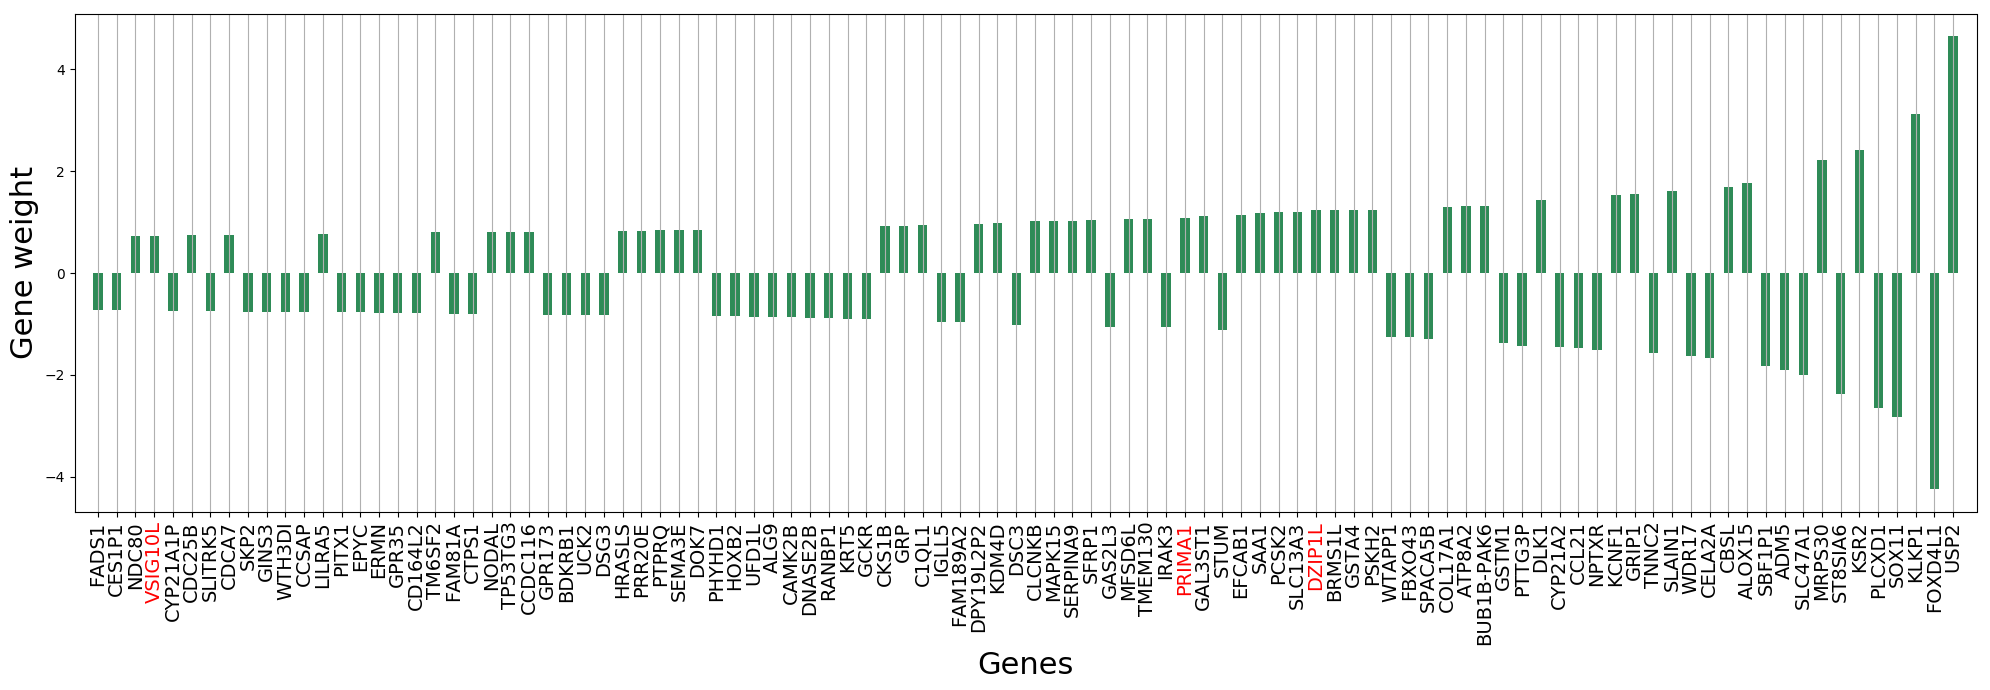

In [62]:
data_exp = clf.coef_[2][sort_idx_3][-100:]

fig = plt.figure(figsize = (20,7))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(100)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, genes[sort_idx_3][-150:])
ax.tick_params(axis='x', labelsize=14, labelrotation=90)

my_colors =['red' if val in pam50_genes_tcga else 'black' for val in genes[sort_idx_3][-100:]]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
plt.margins(x=0.01)
plt.gca().xaxis.grid(True)
fig.tight_layout()
plt.savefig('../figures/top_features_100_log_res_lumA.pdf', bbox_inches='tight')

### Plot weights top 100 subtype 4 - LumB

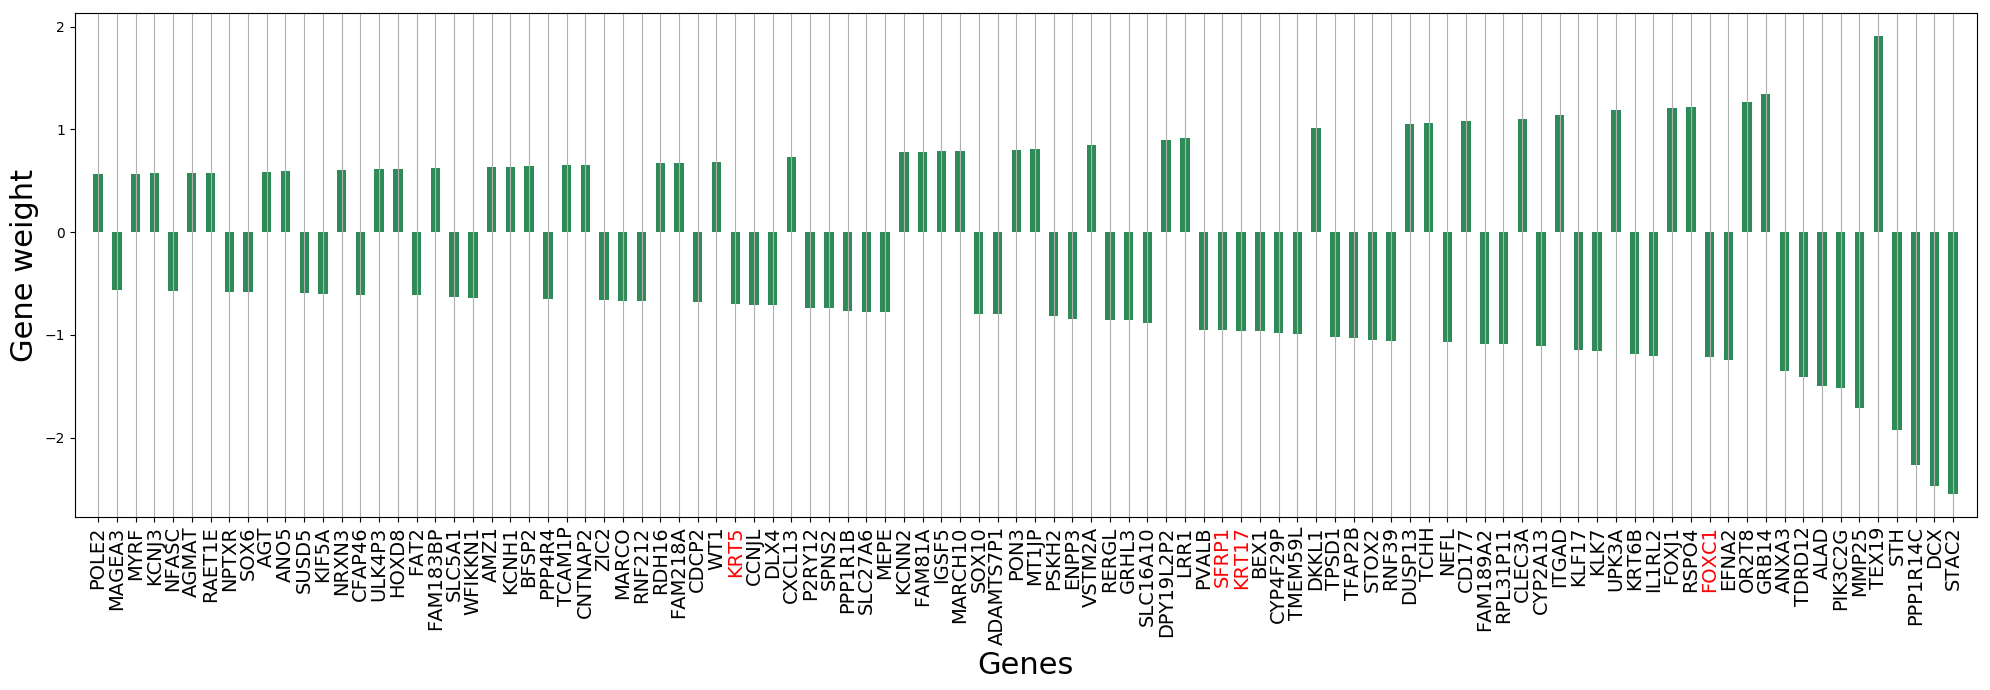

In [63]:
data_exp = clf.coef_[3][sort_idx_4][-100:]

fig = plt.figure(figsize = (20,7))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(100)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, genes[sort_idx_4][-100:])
ax.tick_params(axis='x', labelsize=14, labelrotation=90)

my_colors =['red' if val in pam50_genes_tcga else 'black' for val in genes[sort_idx_4][-100:]]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.margins(x=0.01)
plt.gca().xaxis.grid(True)
fig.tight_layout()
plt.savefig('../figures/top_features_100_log_res_lumB.pdf', bbox_inches='tight')

### Plot weights top 100 subtype 5 - Normal-like

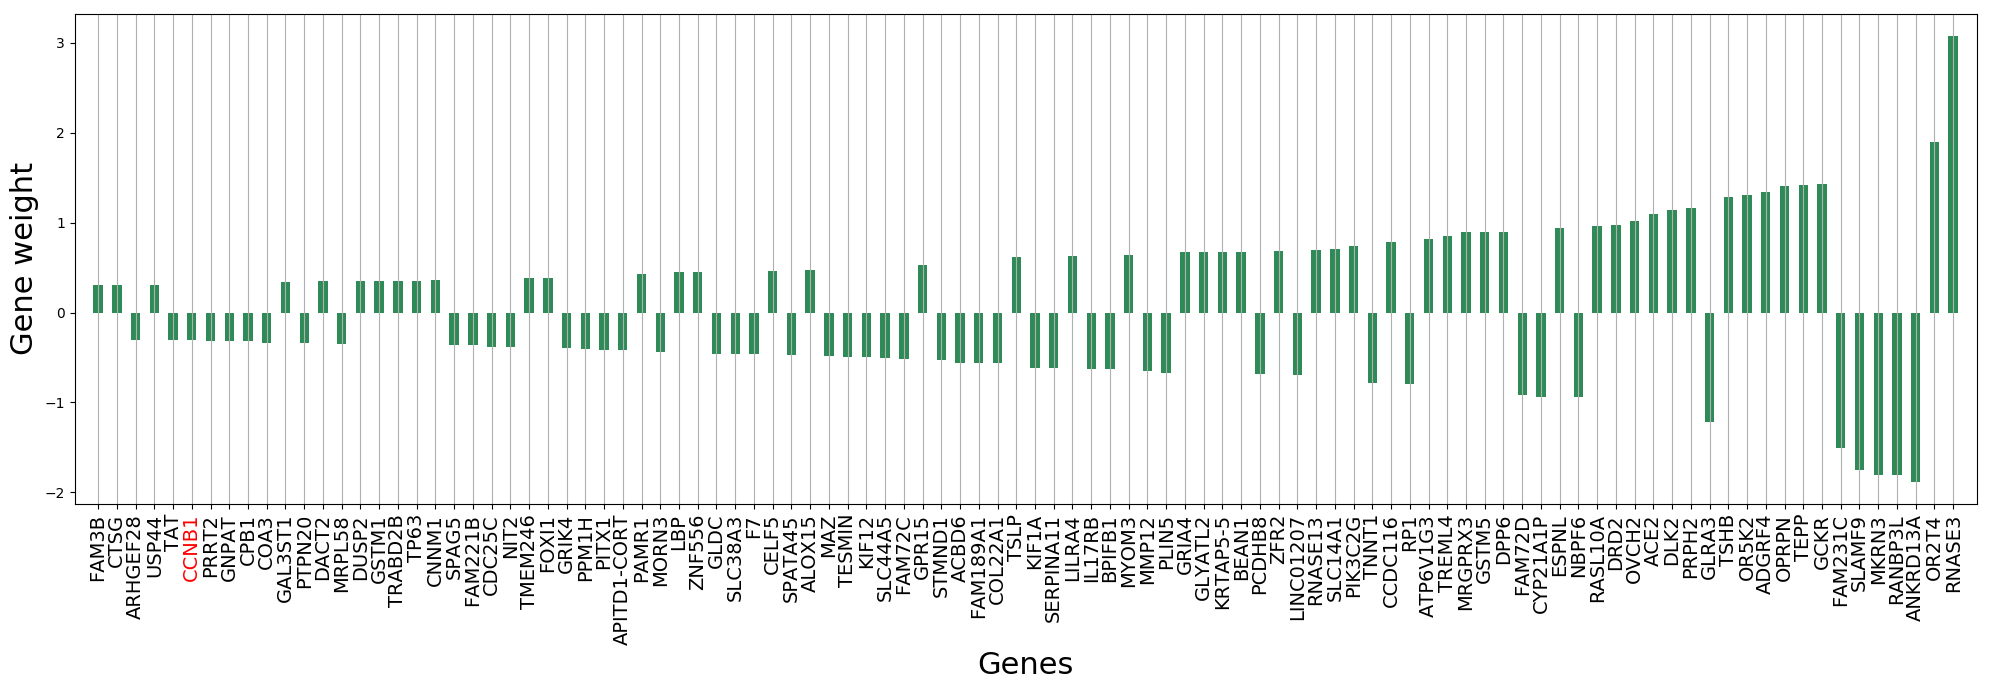

In [64]:
data_exp = clf.coef_[4][sort_idx_5][-100:]

fig = plt.figure(figsize = (20,7))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(100)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, genes[sort_idx_5][-100:])
ax.tick_params(axis='x', labelsize=14, labelrotation=90)

my_colors =['red' if val in pam50_genes_tcga else 'black' for val in genes[sort_idx_5][-100:]]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.margins(x=0.01)
plt.gca().xaxis.grid(True)
fig.tight_layout()
plt.savefig('../figures/top_features_100_log_res_normal.pdf', bbox_inches='tight')

## Do the same plot but with the same set of genes on the x-axis for all subtypes - the ones with largest sum of coefficients accross the 5 subtypes
### Computed as the subset of 250 genes with largest absolute value accross all subtypes

In [48]:
coef_all = abs(clf.coef_[0])+(clf.coef_[1])+abs(clf.coef_[2])+abs(clf.coef_[3])+abs(clf.coef_[4])

In [49]:
coef_all

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
sort_idx_all = np.argsort(abs(coef_all))
inf_250_genes_all = genes[sort_idx_all[-250:]]
inf_250_genes_all_weight = coef_all[sort_idx_all[-250:]]

In [51]:
len(inf_250_genes_all)

250

In [52]:
inf_250_genes_all_weight

array([ 0.77471763,  0.77654552, -0.77777629,  0.7786412 ,  0.78140572,
        0.78605045,  0.78723747,  0.78747691,  0.79030634,  0.79098597,
        0.79101472,  0.79550989,  0.79577229,  0.79886955,  0.8062372 ,
        0.8062482 ,  0.80792981,  0.80829857,  0.80967623,  0.81306608,
       -0.81359254,  0.81465718,  0.81652819,  0.81892329, -0.8199246 ,
        0.82306118,  0.82380674,  0.8306788 ,  0.83408763, -0.83816818,
       -0.84069832,  0.84263564,  0.84303238,  0.84477867,  0.84693357,
        0.84951269,  0.85034107,  0.85149265, -0.85155786,  0.85177622,
        0.85230718,  0.85361042,  0.85467948,  0.8550598 ,  0.86125049,
        0.86343027,  0.86658786,  0.86697218,  0.86733971,  0.86776706,
        0.86851665,  0.87109539,  0.87483953,  0.87944241,  0.87989224,
        0.88164418,  0.88317831,  0.88639109,  0.88840678,  0.88891323,
        0.88945135,  0.88962856,  0.89192828,  0.89298226,  0.89514514,
        0.89739871,  0.90531276,  0.9053307 ,  0.90636078,  0.90

#### Top 250 all - Basal

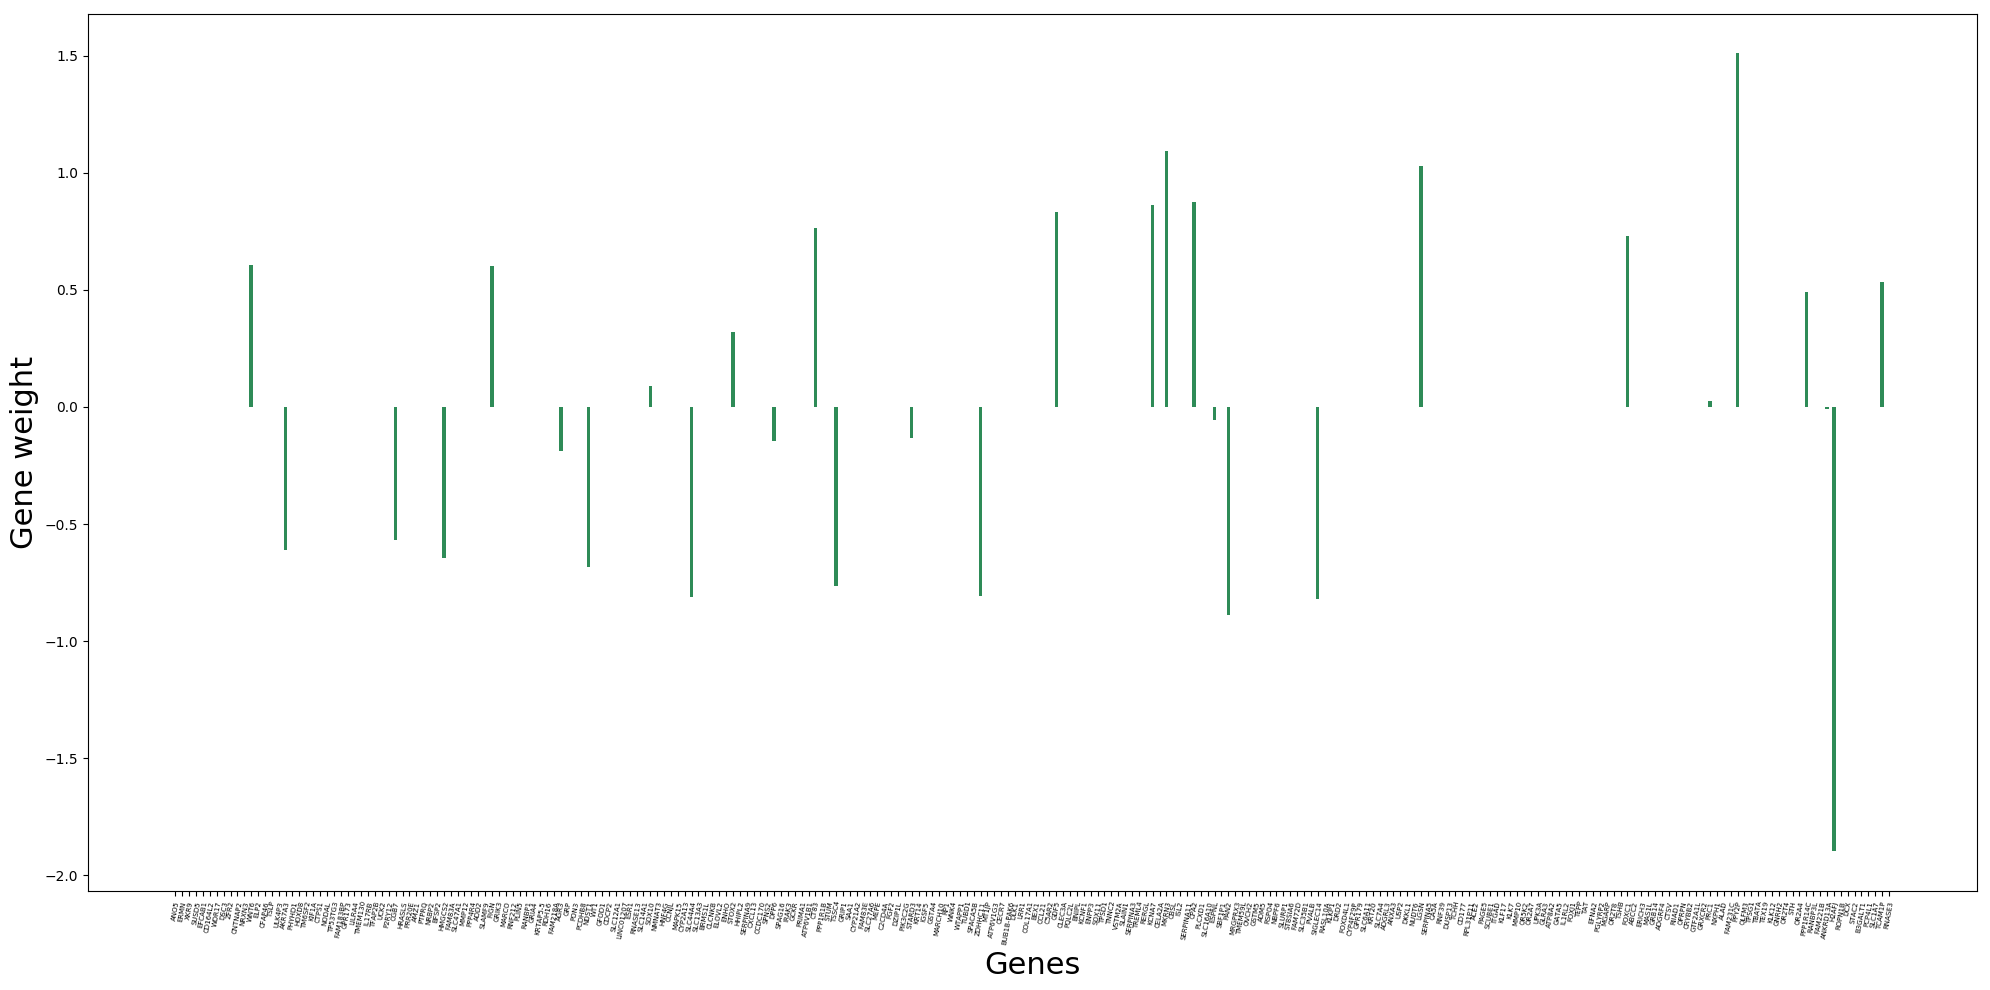

In [59]:
data_exp = clf.coef_[0][sort_idx_all][-250:]

fig = plt.figure(figsize = (20,10))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(250)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, inf_250_genes_all[-250:])
ax.tick_params(axis='x', labelsize=5, labelrotation=80)
fig.tight_layout()
plt.savefig('../figures/top_features_log_res_basal_across_all.pdf', bbox_inches='tight')

### Top 250 all - HER2

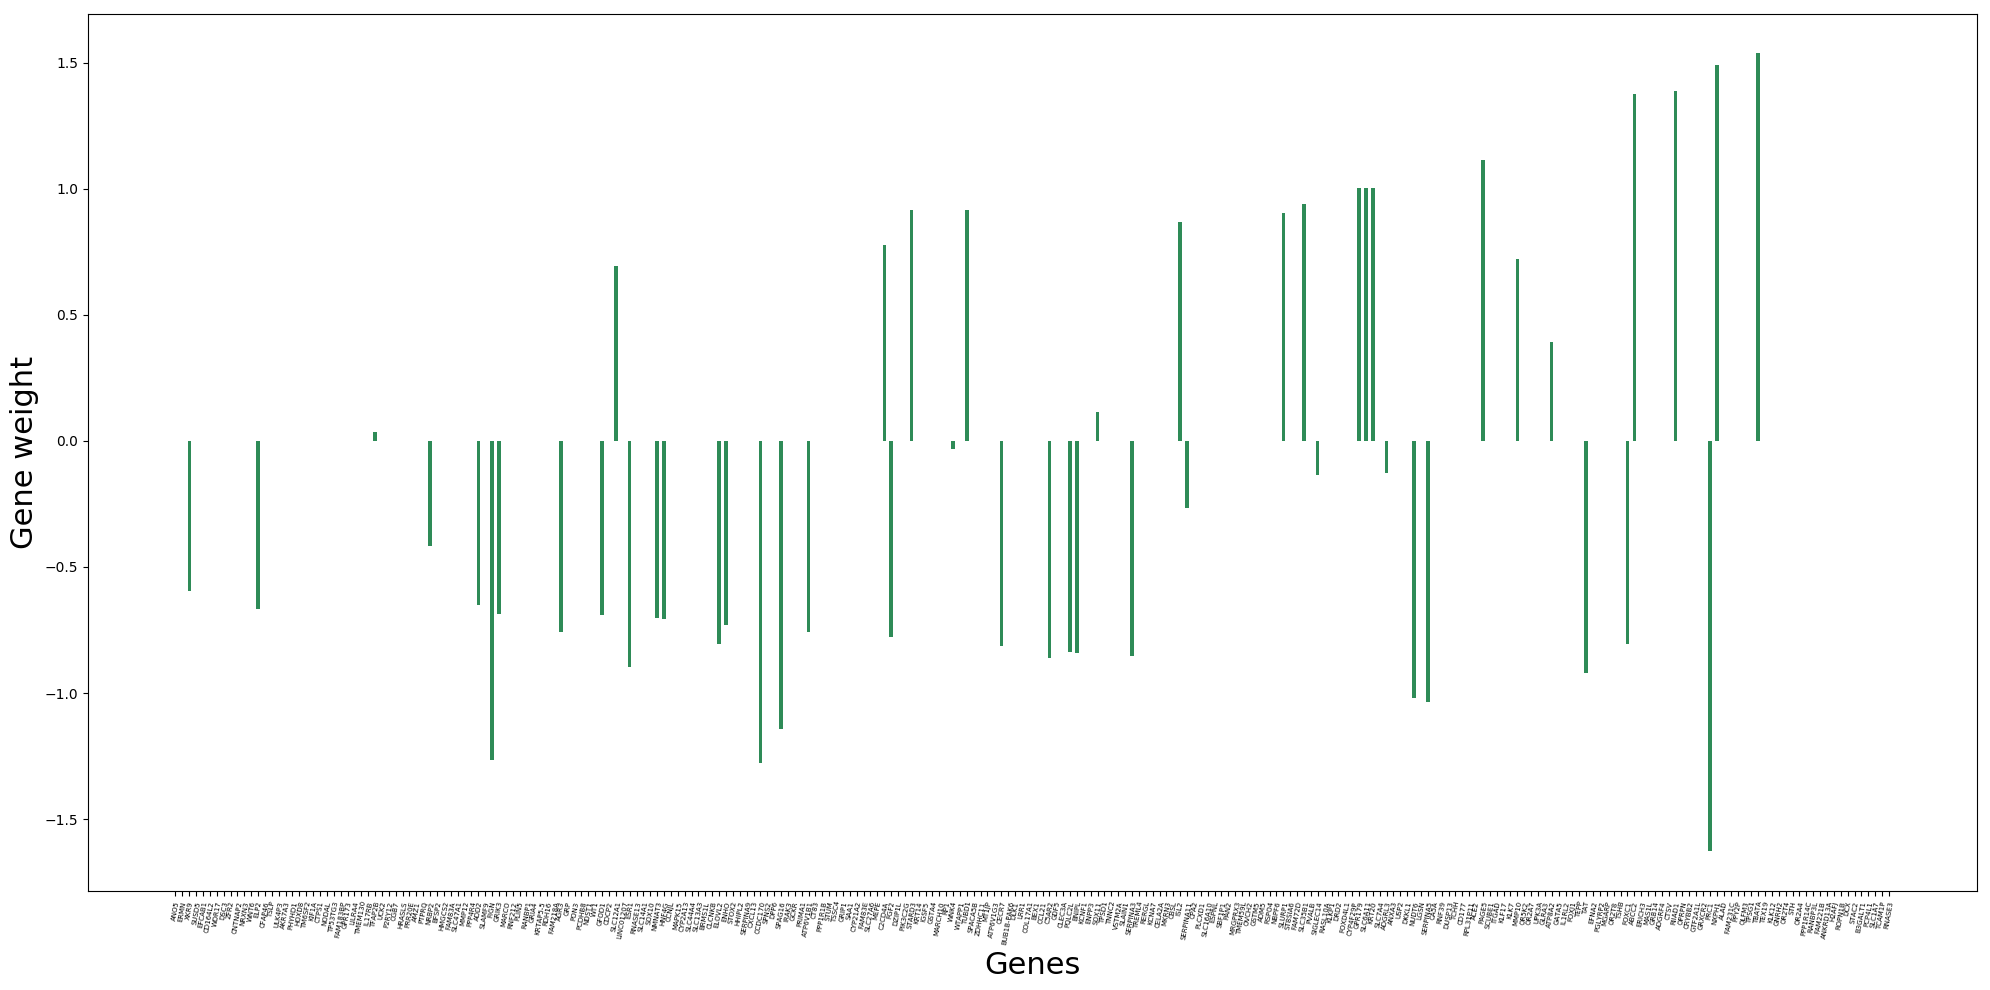

In [60]:
data_exp = clf.coef_[1][sort_idx_all][-250:]

fig = plt.figure(figsize = (20,10))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(250)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, inf_250_genes_all[-250:])
ax.tick_params(axis='x', labelsize=5, labelrotation=80)
fig.tight_layout()
plt.savefig('../figures/top_features_log_res_her2_across_all.pdf', bbox_inches='tight')

### Top 250 all - LumA

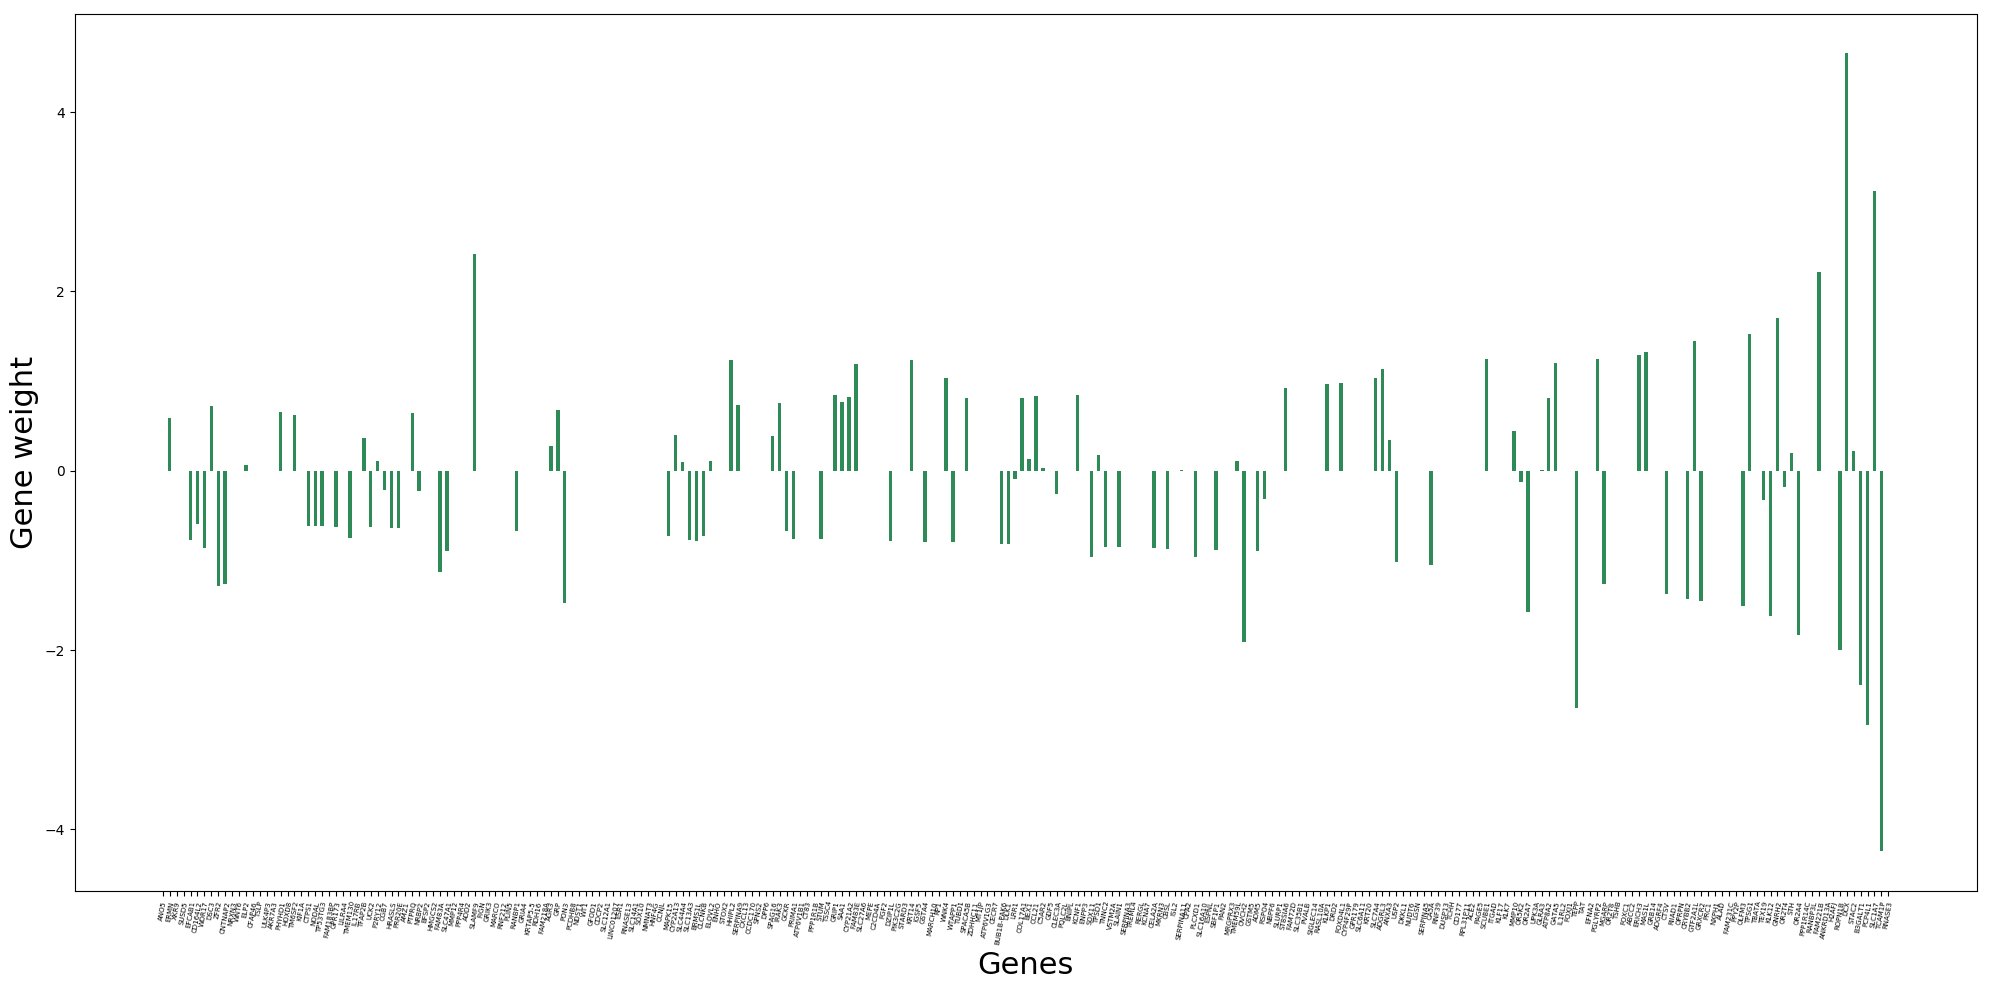

In [61]:
data_exp = clf.coef_[2][sort_idx_all][-250:]

fig = plt.figure(figsize = (20,10))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(250)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, inf_250_genes_all[-250:])
ax.tick_params(axis='x', labelsize=5, labelrotation=80)
fig.tight_layout()
plt.savefig('../figures/top_features_log_res_lumA_across_all.pdf', bbox_inches='tight')

### Top 250 all - LumB

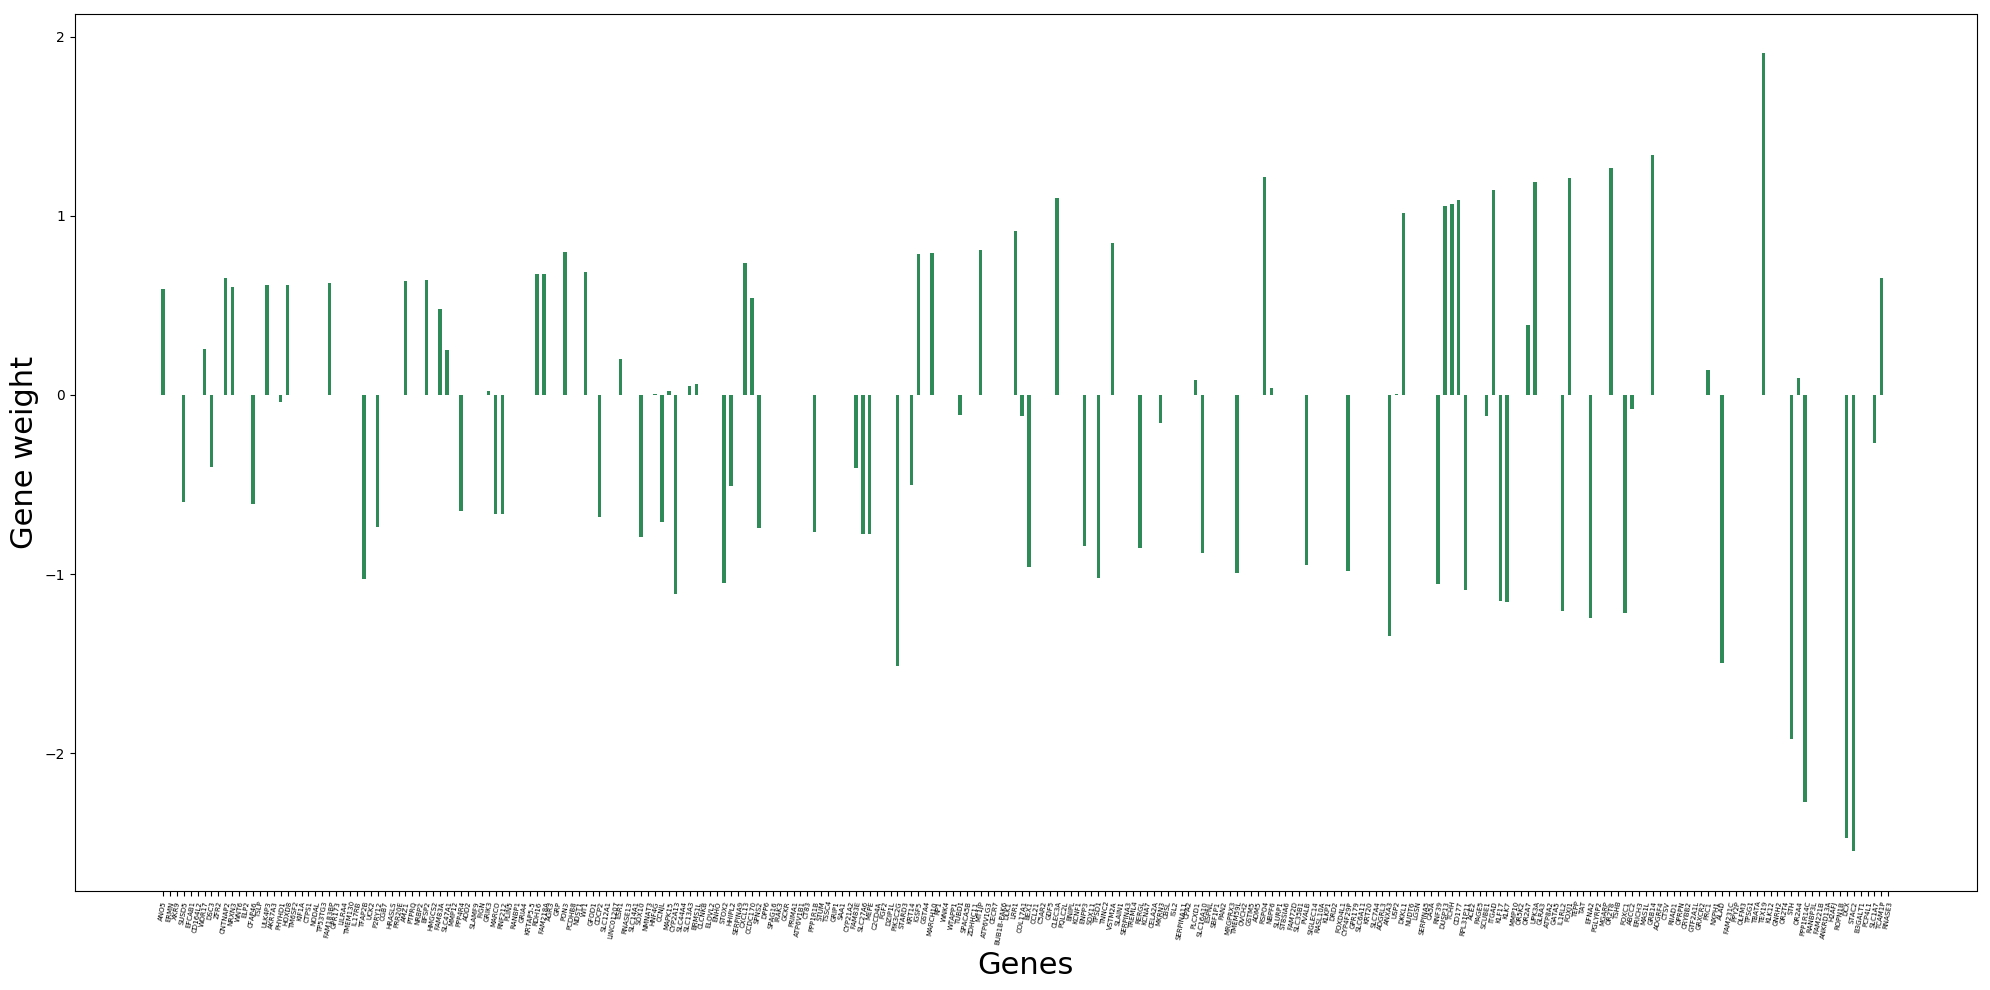

In [62]:
data_exp = clf.coef_[3][sort_idx_all][-250:]

fig = plt.figure(figsize = (20,10))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(250)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, inf_250_genes_all[-250:])
ax.tick_params(axis='x', labelsize=5, labelrotation=80)
fig.tight_layout()
plt.savefig('../figures/top_features_log_res_lumB_across_all.pdf', bbox_inches='tight')

### Top 250 all - Normal-like

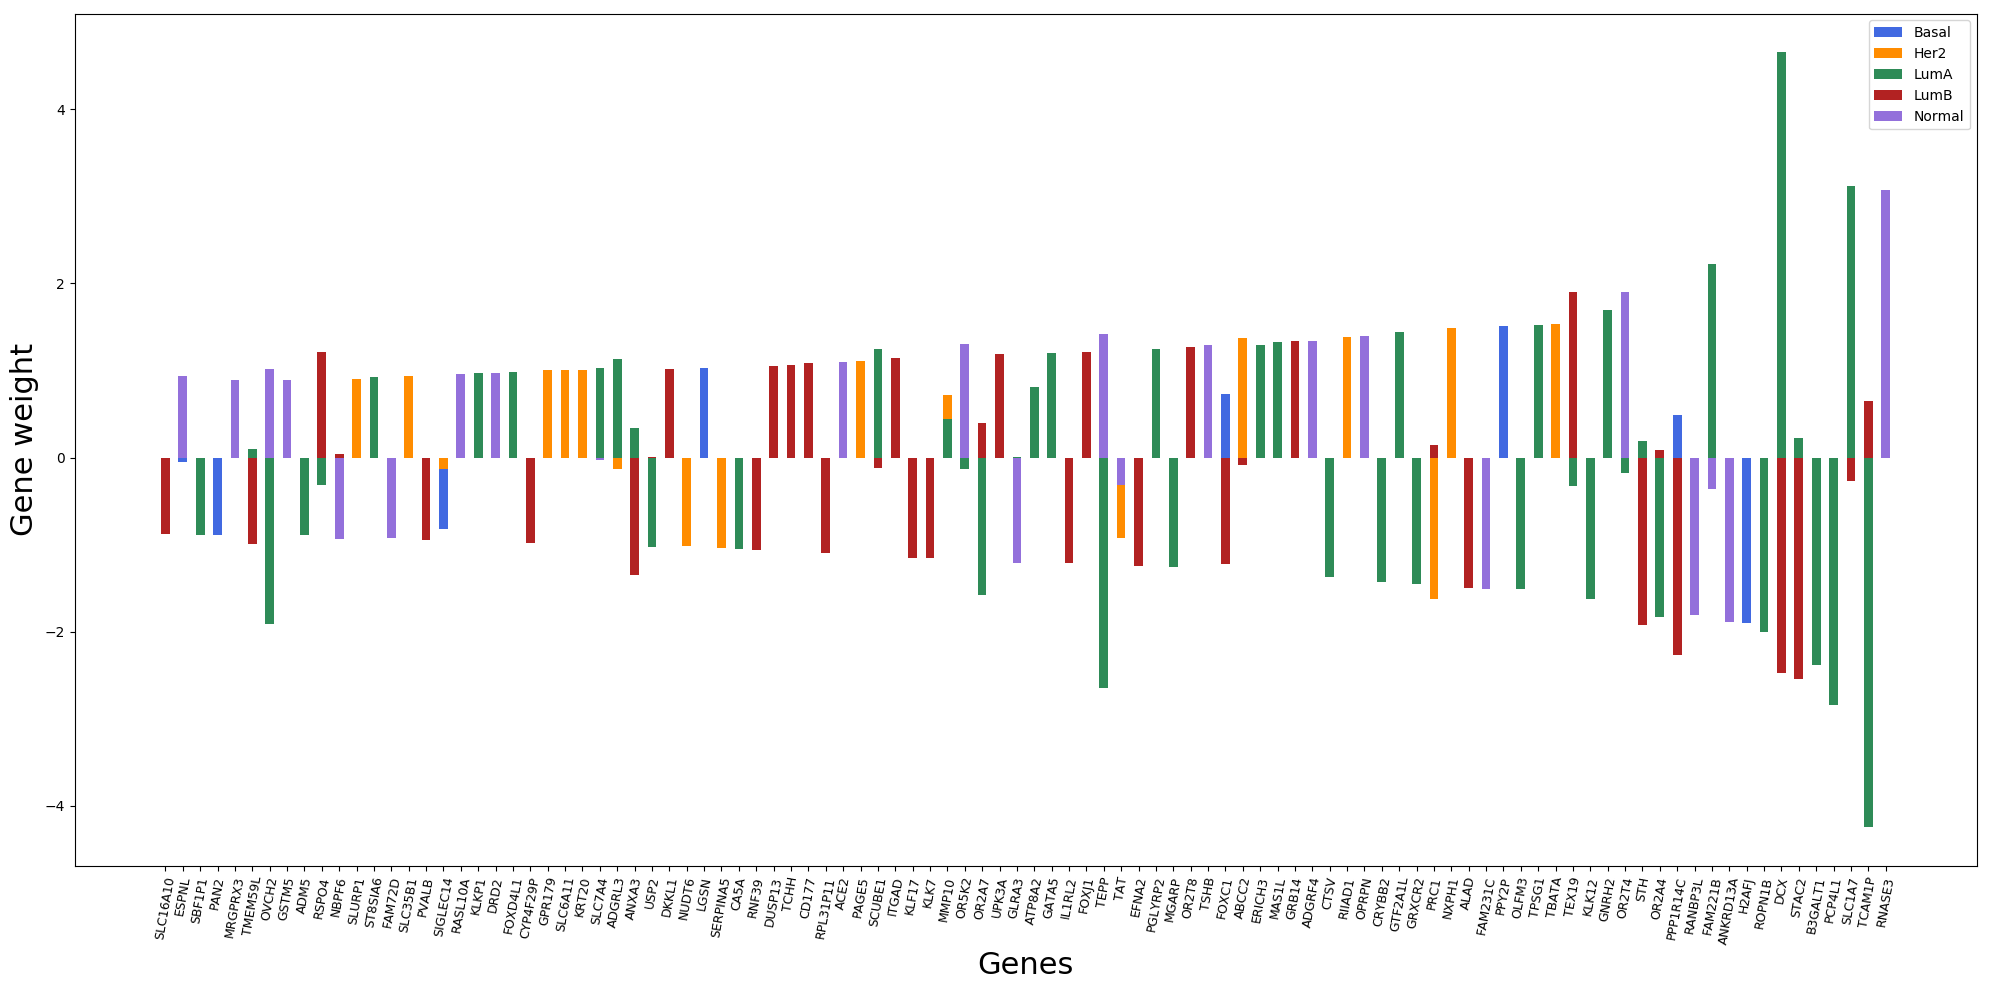

In [48]:
data_exp = clf.coef_[4][sort_idx_all][-250:]

fig = plt.figure(figsize = (20,10))
plt.style.use('default')
ax = fig.add_subplot(111)
xs = np.arange(250)
plt.bar(x=xs, height=data_exp, color="seagreen", width=0.5)
ax.set_ylabel('Gene weight', fontsize=22)
ax.set_xlabel('Genes', fontsize=22)
plt.xticks(xs, inf_250_genes_all[-250:])
ax.tick_params(axis='x', labelsize=5, labelrotation=80)
fig.tight_layout()
plt.savefig('../figures/top_features_log_res_normal_across_all.pdf', bbox_inches='tight')

## All in the same plot

In [58]:
df_all = pd.DataFrame(columns=["Gene Weight", "Genes", "Subtype"])

data_exp_1 = clf.coef_[0][sort_idx_all][-100:]
data_exp_2 = clf.coef_[1][sort_idx_all][-100:]
data_exp_3 = clf.coef_[2][sort_idx_all][-100:]
data_exp_4 = clf.coef_[3][sort_idx_all][-100:]
data_exp_5 = clf.coef_[4][sort_idx_all][-100:]
genes_last = inf_250_genes_all[-100:]

df_basal = pd.DataFrame()
df_basal["Gene Weight"] = data_exp_1
df_basal["Genes"] = genes_last
df_basal["Subtype"] = 'Basal'
df_all = df_all.append(df_basal)

df_her2 = pd.DataFrame()
df_her2["Gene Weight"] = data_exp_2
df_her2["Genes"] = genes_last
df_her2["Subtype"] = 'Her2-enriched'
df_all = df_all.append(df_her2)

df_lumA = pd.DataFrame()
df_lumA["Gene Weight"] = data_exp_3
df_lumA["Genes"] = genes_last
df_lumA["Subtype"] = 'Luminal A'
df_all = df_all.append(df_lumA)

df_lumB = pd.DataFrame()
df_lumB["Gene Weight"] = data_exp_4
df_lumB["Genes"] = genes_last
df_lumB["Subtype"] = 'Luminal B'
df_all = df_all.append(df_lumB)

df_normal = pd.DataFrame()
df_normal["Gene Weight"] = data_exp_5
df_normal["Genes"] = genes_last
df_normal["Subtype"] = 'Normal-like'
df_all = df_all.append(df_normal)

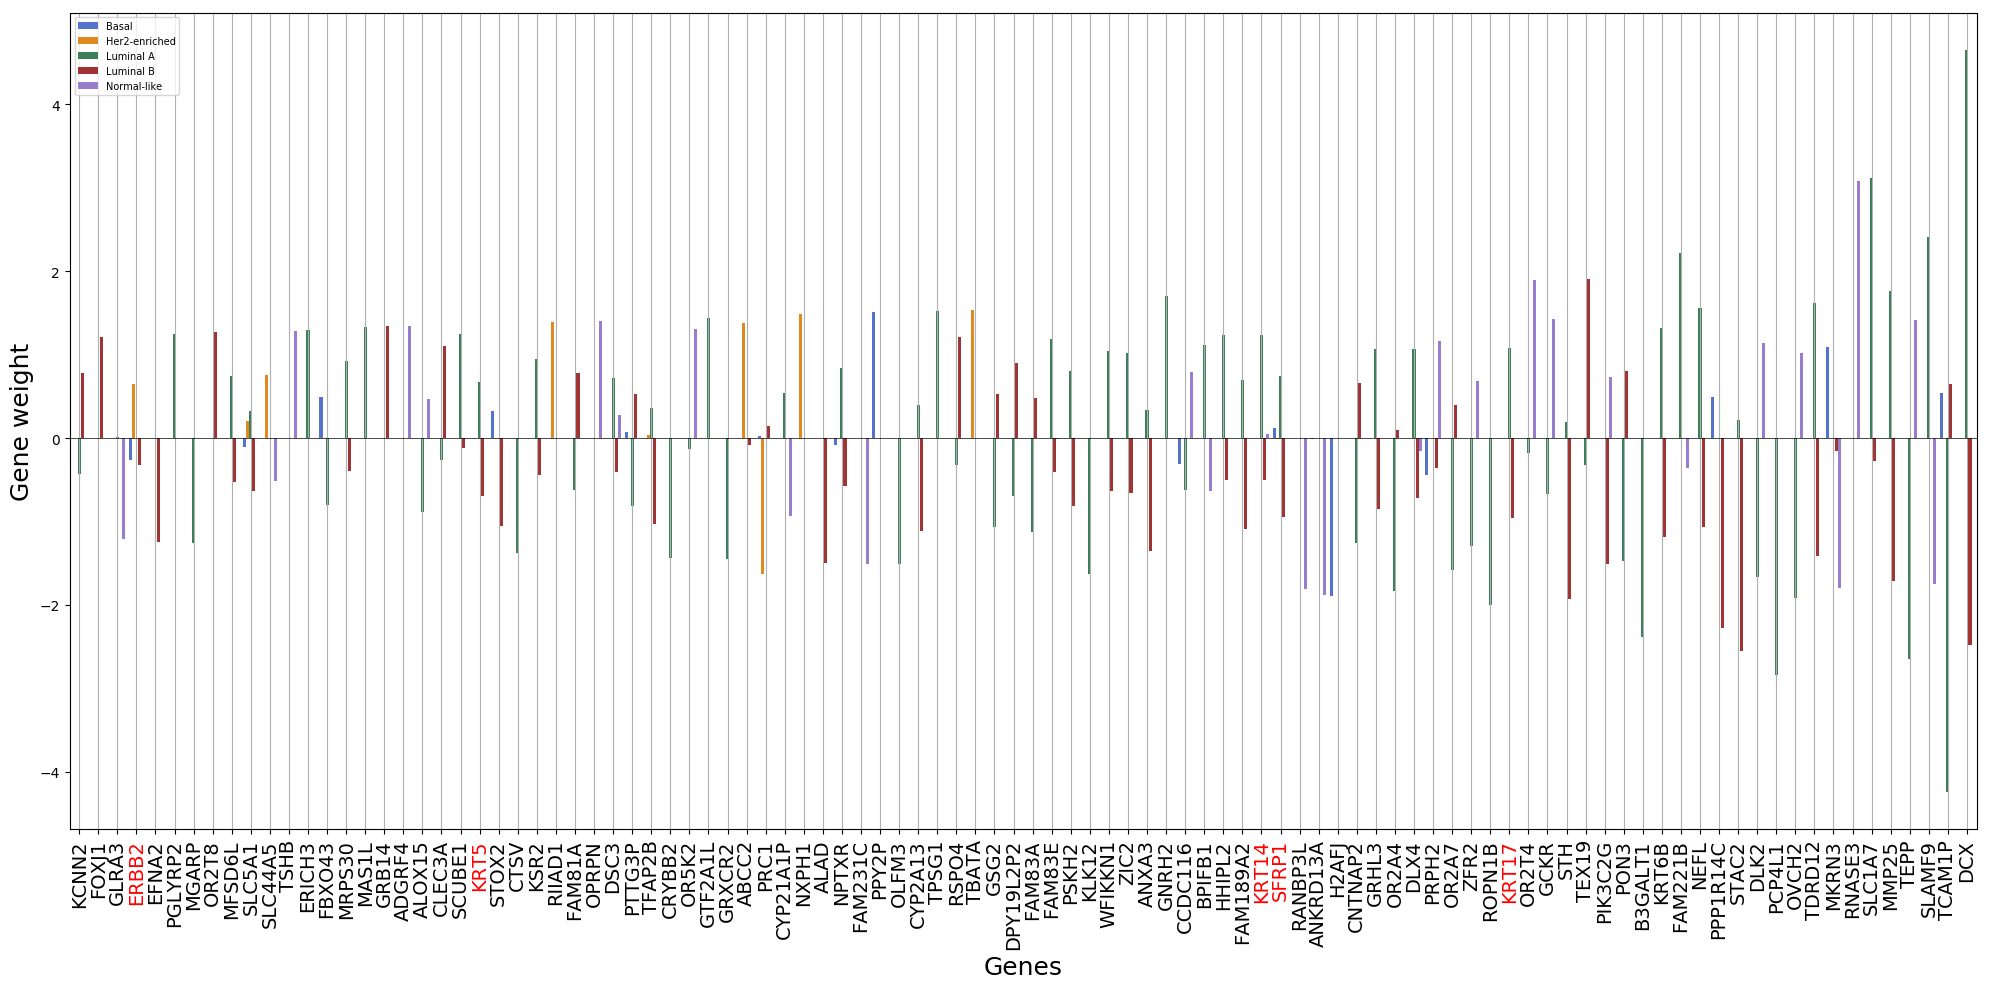

In [59]:
fig = plt.figure(figsize = (20,10))


my_palette = sns.color_palette(['royalblue', 'darkorange', 'seagreen', 'firebrick', 'mediumpurple'])
plt.style.use('default')
ax = sns.barplot(x="Genes", y="Gene Weight", data=df_all, hue='Subtype', palette=my_palette, dodge=True)
ax.set_ylabel('Gene weight', fontsize=18)
ax.set_xlabel('Genes', fontsize=18)
ax.tick_params(axis='x', labelsize=14, labelrotation=90)

my_colors =['red' if val in pam50_genes_tcga else 'black' for val in genes_last]
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.legend(loc='best', fontsize=7)
fig.tight_layout()
plt.gca().xaxis.grid(True)
plt.axhline(y=0,color='black', lw=0.5)
plt.savefig('../figures/top_features_log_res_all_across_all_first_100.pdf', bbox_inches='tight')

## Get data for performance_curves

In [54]:
random_gen = [10, 50, 23, 42, 4, 6, 43, 75, 22, 1]
data_percent = [1, 0.5, 0.25, 0.125]
i=1

for percent in data_percent:
    X_train_full = pd.read_pickle("../data/tcga_brca_raw_19036_row_log_norm_train.pkl")
    # Training set
    
    if percent<1:
        X_train, trash = train_test_split(X_train_full, train_size=percent, stratify=X_train_full["Ciriello_subtype"], shuffle=True)
    else:
        X_train = X_train_full
        
    y_train = X_train["Ciriello_subtype"]
    X_train.drop(['tcga_id', 'Ciriello_subtype', 'sample_id', 'cancer_type'], axis="columns", inplace=True)

    # Order the features correctly
    X_train = X_train.reindex(sorted(X_train.columns), axis="columns")
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

    for s_index in range(10):
        print("SPLIT {}".format(s_index))
        
        results_df = pd.DataFrame(columns=["Fold", "Accuracy"])
        # Using different seeds for each fold
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_gen[s_index])
        scores = []

        for train_index, test_index in skf.split(X_train_scaled, y_train):

            X_cv_train, X_cv_val = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
            y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[test_index]

            clf = LogisticRegression(random_state=0, solver='liblinear', penalty="l1", C=1, multi_class="auto").fit(X_cv_train, y_cv_train)

            score = clf.score(X_cv_val, y_cv_val)
            results_df = results_df.append({'Fold': i, 'Accuracy' : score}, ignore_index=True)
            scores.append(score)
            i+=1
        
        i=1 
        results_df = results_df.assign(mean_accuracy=np.mean(scores))
        print('Results: {}'.format(scores))
        print('Accuracy: {}'.format(np.mean(scores)))

        output_filename="../results/performance_curves/logistic_regression/{}_brca_data_split_{}_classifier.csv".format(percent, s_index)
        results_df.to_csv(output_filename)

SPLIT 0
Results: [0.8787878787878788, 0.8834355828220859, 0.8711656441717791, 0.8957055214723927, 0.8588957055214724]
Accuracy: 0.8775980665551218
SPLIT 1
Results: [0.896969696969697, 0.8588957055214724, 0.8957055214723927, 0.8650306748466258, 0.8650306748466258]
Accuracy: 0.8763264547313627
SPLIT 2
Results: [0.8121212121212121, 0.9141104294478528, 0.8588957055214724, 0.9079754601226994, 0.901840490797546]
Accuracy: 0.8789886596021566
SPLIT 3
Results: [0.8727272727272727, 0.901840490797546, 0.8957055214723927, 0.852760736196319, 0.8650306748466258]
Accuracy: 0.8776129392080312
SPLIT 4
Results: [0.9090909090909091, 0.8711656441717791, 0.901840490797546, 0.8773006134969326, 0.8404907975460123]
Accuracy: 0.8799776910206358
SPLIT 5
Results: [0.8787878787878788, 0.8773006134969326, 0.8466257668711656, 0.9079754601226994, 0.8834355828220859]
Accuracy: 0.8788250604201524
SPLIT 6
Results: [0.8424242424242424, 0.8650306748466258, 0.8588957055214724, 0.8895705521472392, 0.8588957055214724]
Accur

/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


SPLIT 0
Results: [0.8690476190476191, 0.8333333333333334, 0.8658536585365854, 0.8607594936708861, 0.8860759493670886]
Accuracy: 0.8630140107911025
SPLIT 1
Results: [0.8928571428571429, 0.8690476190476191, 0.8536585365853658, 0.8987341772151899, 0.8481012658227848]
Accuracy: 0.8724797483056204
SPLIT 2
Results: [0.8214285714285714, 0.8690476190476191, 0.8536585365853658, 0.8481012658227848, 0.8734177215189873]
Accuracy: 0.8531307428806658
SPLIT 3
Results: [0.8333333333333334, 0.7738095238095238, 0.8780487804878049, 0.8607594936708861, 0.8607594936708861]
Accuracy: 0.8413421249944868
SPLIT 4
Results: [0.8809523809523809, 0.8333333333333334, 0.8536585365853658, 0.8481012658227848, 0.7721518987341772]
Accuracy: 0.8376394830856084
SPLIT 5
Results: [0.8809523809523809, 0.8928571428571429, 0.7682926829268293, 0.8860759493670886, 0.8481012658227848]
Accuracy: 0.8552558843852452
SPLIT 6
Results: [0.8690476190476191, 0.8214285714285714, 0.8658536585365854, 0.8734177215189873, 0.8734177215189873]


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


SPLIT 0
Results: [0.8372093023255814, 0.7560975609756098, 0.7804878048780488, 0.8536585365853658, 0.7894736842105263]
Accuracy: 0.8033853777950265
SPLIT 1
Results: [0.7906976744186046, 0.8536585365853658, 0.7804878048780488, 0.7560975609756098, 0.7894736842105263]
Accuracy: 0.7940830522136311
SPLIT 2
Results: [0.7674418604651163, 0.7073170731707317, 0.8536585365853658, 0.7804878048780488, 0.8157894736842105]
Accuracy: 0.7849389497566946
SPLIT 3
Results: [0.813953488372093, 0.7317073170731707, 0.8048780487804879, 0.7804878048780488, 0.8421052631578947]
Accuracy: 0.794626384452339
SPLIT 4
Results: [0.6976744186046512, 0.7560975609756098, 0.8292682926829268, 0.8780487804878049, 0.8947368421052632]
Accuracy: 0.8111651789712511
SPLIT 5
Results: [0.8837209302325582, 0.7804878048780488, 0.7073170731707317, 0.8048780487804879, 0.868421052631579]
Accuracy: 0.808964981938681
SPLIT 6
Results: [0.7906976744186046, 0.8292682926829268, 0.7804878048780488, 0.8048780487804879, 0.7631578947368421]
Accu

/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


SPLIT 0
Results: [0.7391304347826086, 0.7727272727272727, 0.85, 0.8333333333333334, 0.7894736842105263]
Accuracy: 0.7969329450107482
SPLIT 1


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: [0.8636363636363636, 0.782608695652174, 0.85, 0.7222222222222222, 0.7368421052631579]
Accuracy: 0.7910618773547836
SPLIT 2


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: [0.8636363636363636, 0.7391304347826086, 0.8, 0.7894736842105263, 0.8888888888888888]
Accuracy: 0.8162258743036777
SPLIT 3


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: [0.782608695652174, 0.7272727272727273, 0.75, 0.8421052631578947, 0.8888888888888888]
Accuracy: 0.798175114994337
SPLIT 4


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: [0.782608695652174, 0.8181818181818182, 0.75, 0.8888888888888888, 0.7894736842105263]
Accuracy: 0.8058306173866814
SPLIT 5


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: [0.8181818181818182, 0.8636363636363636, 0.7, 0.6842105263157895, 0.7894736842105263]
Accuracy: 0.7711004784688995
SPLIT 6


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: [0.8636363636363636, 0.6956521739130435, 0.65, 0.8421052631578947, 0.7777777777777778]
Accuracy: 0.7658343156970159
SPLIT 7


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: [0.7391304347826086, 0.8636363636363636, 0.75, 0.8333333333333334, 0.8421052631578947]
Accuracy: 0.8056410789820401
SPLIT 8


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: [0.782608695652174, 0.7391304347826086, 0.8421052631578947, 0.6842105263157895, 0.8888888888888888]
Accuracy: 0.7873887617594711
SPLIT 9


/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Results: [0.7391304347826086, 0.782608695652174, 0.6842105263157895, 0.7894736842105263, 0.8333333333333334]
Accuracy: 0.7657513348588864


## Try Ridge Regression now

In [12]:
values=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
i=1
results = pd.DataFrame(columns=["Index", "C", "Accuracy"])
mean_scores = []

skf = StratifiedKFold(n_splits=5, shuffle=True)
for c in values:
    scores = []

    for train_index, test_index in skf.split(X_train_scaled, y_train):

        X_cv_train, X_cv_val = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
        y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[test_index]

        clf_ridge = LogisticRegression(random_state=0, solver='liblinear', penalty="l2", C=c, multi_class="auto").fit(X_cv_train, y_cv_train)

        score = clf_ridge.score(X_cv_val, y_cv_val)
        results = results.append({'Fold': i, 'C' : c , 'Score' : score}, ignore_index=True)
        scores.append(score)
        i+=1

    i=1
    mean_scores.append(np.mean(scores))
    print('Results: {}'.format(scores))
    print('C: {}, Accuracy: {}'.format(c, np.mean(scores)))

#results.to_csv("parameter_tuning/LogisticRegression/tcga_c_tuning_all_genes.csv", index=False)
mean_scores

Results: [0.8, 0.7975460122699386, 0.803680981595092, 0.7852760736196319, 0.7852760736196319]
C: 0.001, Accuracy: 0.7943558282208588
Results: [0.8484848484848485, 0.8773006134969326, 0.8711656441717791, 0.8650306748466258, 0.852760736196319]
C: 0.01, Accuracy: 0.862948503439301
Results: [0.8484848484848485, 0.8711656441717791, 0.8711656441717791, 0.8773006134969326, 0.9079754601226994]
C: 0.1, Accuracy: 0.8752184420896076
Results: [0.8787878787878788, 0.8343558282208589, 0.8588957055214724, 0.9202453987730062, 0.9079754601226994]
C: 1, Accuracy: 0.8800520542851832
Results: [0.8787878787878788, 0.8895705521472392, 0.8834355828220859, 0.8773006134969326, 0.8711656441717791]
C: 10, Accuracy: 0.8800520542851832
Results: [0.8727272727272727, 0.8895705521472392, 0.8957055214723927, 0.8895705521472392, 0.8773006134969326]
C: 100, Accuracy: 0.8849749023982152
Results: [0.8727272727272727, 0.9141104294478528, 0.8282208588957055, 0.8773006134969326, 0.8650306748466258]
C: 1000, Accuracy: 0.87147

[0.7943558282208588,
 0.862948503439301,
 0.8752184420896076,
 0.8800520542851832,
 0.8800520542851832,
 0.8849749023982152,
 0.8714779698828778,
 0.8764156906488196]

In [13]:
clf_ridge = LogisticRegression(random_state=0, solver='liblinear', penalty="l2", C=100, multi_class="auto").fit(X_train_scaled, y_train)

In [14]:
final_score = clf_ridge.score(X_test_scaled, y_test)
print('Confusion matrix\n', confusion_matrix(y_test, clf_ridge.predict(X_test_scaled)))
print('Accuracy', final_score)

Confusion matrix
 [[ 43   0   0   0   0]
 [  0  15   0   1   0]
 [  0   1 126   4   0]
 [  0   0   5  27   0]
 [  0   2   5   1   6]]
Accuracy 0.9194915254237288


In [15]:
print("First class (Basal) has {} genes counting".format(len(clf_ridge.coef_[0][clf_ridge.coef_[0]!=0])))
rel_genes_1 = genes[clf_ridge.coef_[0]!=0]
print("Second class (HER2) has {} genes counting".format(len(clf_ridge.coef_[1][clf_ridge.coef_[1]!=0])))
rel_genes_2 = genes[clf_ridge.coef_[1]!=0]
print("Third class (Luminal A) has {} genes counting".format(len(clf_ridge.coef_[2][clf_ridge.coef_[2]!=0])))
rel_genes_3 = genes[clf_ridge.coef_[2]!=0]
print("Fourth class (Luminal B) has {} genes counting".format(len(clf_ridge.coef_[3][clf_ridge.coef_[3]!=0])))
rel_genes_4 = genes[clf_ridge.coef_[3]!=0]
print("Fifth class (Normal-like) has {} genes counting".format(len(clf_ridge.coef_[4][clf_ridge.coef_[4]!=0])))
rel_genes_5 = genes[clf_ridge.coef_[4]!=0]

First class (Basal) has 19035 genes counting
Second class (HER2) has 19035 genes counting
Third class (Luminal A) has 19035 genes counting
Fourth class (Luminal B) has 19035 genes counting
Fifth class (Normal-like) has 19035 genes counting
